## Glassdoor Jobs (2017-2018)
#### url:    https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
# Dependencies and Setup
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [150]:
# Connect to a SQLite database
connection = sqlite3.connect('../Resources/glassdoor_jobs.db')
query = "SELECT * FROM glassdoor"
glassdoor = pd.read_sql_query(query, connection)

In [151]:
# Verify
print(glassdoor.columns)
glassdoor.shape

Index(['index', 'job_state', 'job_region', 'Sector', 'Company_Age',
       'Avg_Company_Revenue', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary',
       'Min_Salary', 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n',
       'Spark_y_n', 'AWS_y_n', 'Excel_y_n'],
      dtype='object')


(742, 17)

## Visual Understanding of Data for Salary Prediction

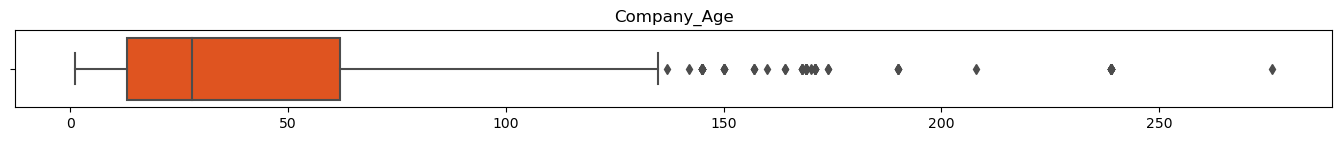

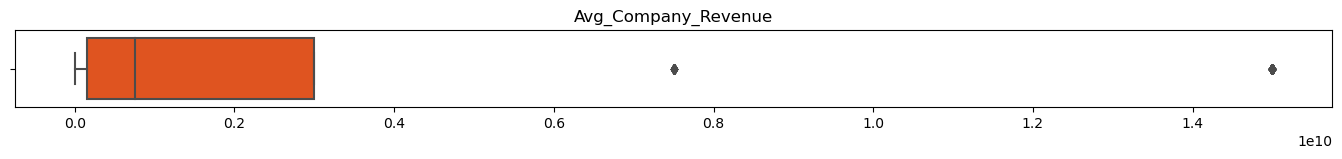

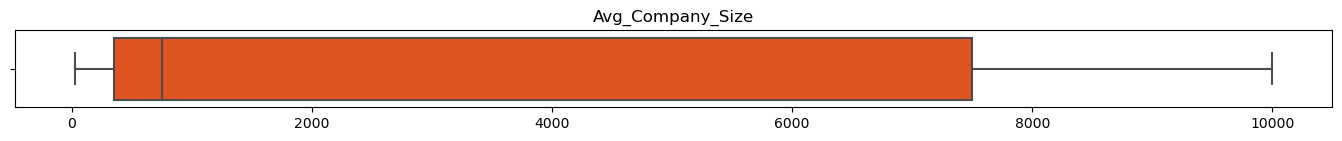

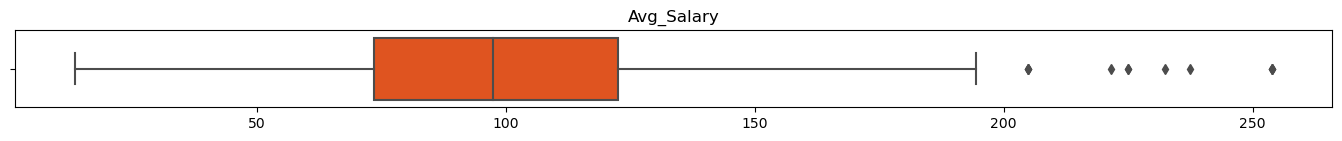

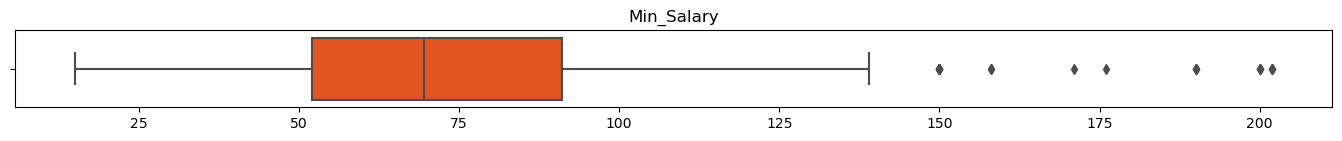

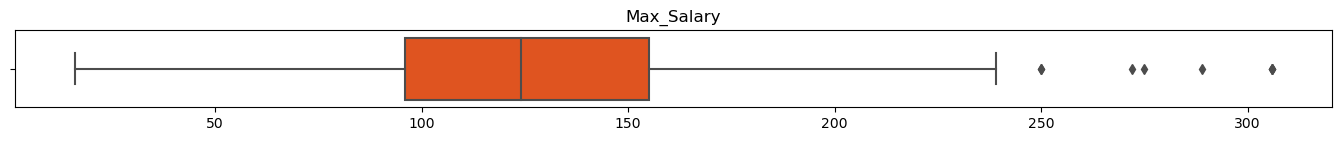

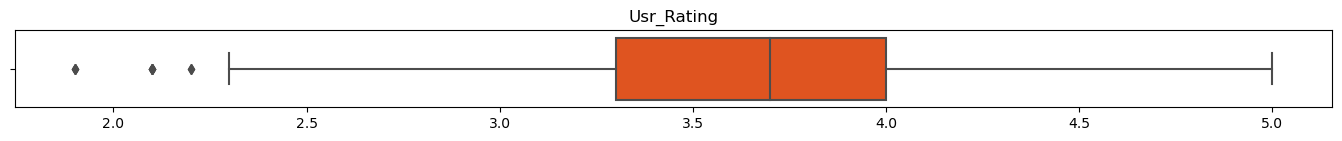

In [152]:
# Boxplot for all numeric fearures
glassdoor.drop(['index'], axis=1, inplace=True)

glassdoor_numeric = glassdoor.select_dtypes(exclude = ['object'])

exclude_lang = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']
glassdoor_numeric = glassdoor_numeric.drop(columns = exclude_lang, axis=1)

# print(glassdoor_numeric.columns, '\n')

for i, column in enumerate(glassdoor_numeric.columns):
    
    col_min = glassdoor_numeric[column].min()
    # print(f'{column}(min): {col_min}')
    
    mask = glassdoor_numeric.query(f'{column} > 0')
    if not mask.empty:
        fig_num = i + 1
        plt.figure(figsize=(17, 1))
        sns.boxplot(data = mask, x = column, color = 'orangered')
        plt.title(column)
        plt.xlabel('')
        plt.show


In [153]:
# glassdoor dataframe
glassdoor.head()

job_state job_region                        Sector  Company_Age  \
0        NM  Southwest           Aerospace & Defense           47   
1        MD  Northeast                   Health Care           36   
2        FL  Southeast             Business Services           10   
3        WA       West  Oil, Gas, Energy & Utilities           55   
4        NY  Northeast             Business Services           22   

   Avg_Company_Revenue  Avg_Company_Size       Job_Title  Avg_Salary  \
0         7.500000e+07               750  Data Scientist        72.0   
1         3.000000e+09             10000  Data Scientist        87.5   
2         1.500000e+08               750  Data Scientist        85.0   
3         7.500000e+08              3000  Data Scientist        76.5   
4         1.500000e+08               125  Data Scientist       114.5   

   Min_Salary  Max_Salary  Usr_Rating  Python_y_n  R_y_n  Spark_y_n  AWS_y_n  \
0          53          91         3.8           1      0          0        0   
1          63         112         3.4           1      0          0        0   
2          80          90         4.8           1      0          1        0   
3          56          97         3.8           1      0          0        0   
4          86         143         2.9           1      0          0        0   

   Excel_y_n  
0          1  
1          0  
2          1  
3          0  
4          1

In [154]:
glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_state            742 non-null    object 
 1   job_region           742 non-null    object 
 2   Sector               742 non-null    object 
 3   Company_Age          742 non-null    int64  
 4   Avg_Company_Revenue  742 non-null    float64
 5   Avg_Company_Size     742 non-null    int64  
 6   Job_Title            742 non-null    object 
 7   Avg_Salary           742 non-null    float64
 8   Min_Salary           742 non-null    int64  
 9   Max_Salary           742 non-null    int64  
 10  Usr_Rating           742 non-null    float64
 11  Python_y_n           742 non-null    int64  
 12  R_y_n                742 non-null    int64  
 13  Spark_y_n            742 non-null    int64  
 14  AWS_y_n              742 non-null    int64  
 15  Excel_y_n            742 non-null    int

### Pie Plot - Job Regions

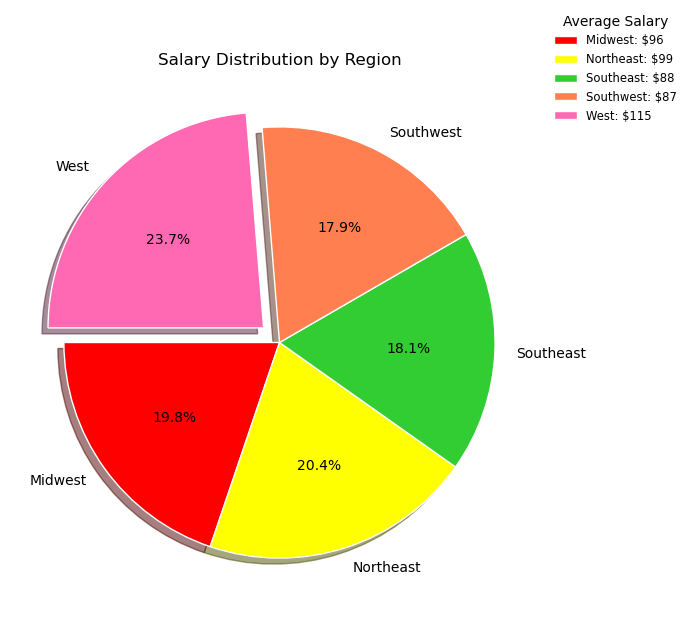

In [155]:
Region_Salary = glassdoor.groupby('job_region')['Avg_Salary'].mean().round(0)
# print(Region_Salary, '\n\n')
# job_regions = ['Midwest', 'Northeast', 'Southeast', 'Southwest', 'West']
job_regions = ['Midwest', 'Northeast', 'Southeast', 'Southwest', 'West']

plt.rcParams["figure.figsize"] = (7, 7)
plt.pie(Region_Salary.tolist(),
        labels = job_regions,
        colors = ['red', 'yellow', 'limegreen', 'coral', 'hotpink'],
        startangle = 180, shadow = True, 
        explode = (0, 0, 0, 0, 0.1), autopct = '%1.1f%%',
        wedgeprops=dict(edgecolor='white')),


plt.legend(
    labels=[f'{region}: ${salary:.0f}' for region, salary in zip(job_regions, Region_Salary)],
    edgecolor = 'white',
    loc = (1.0, 0.9),
    title='Average Salary',
    fontsize='small'
)
plt.title("Salary Distribution by Region")
plt.show()

### Bar Chart - Max/Min Salaries By Sectors

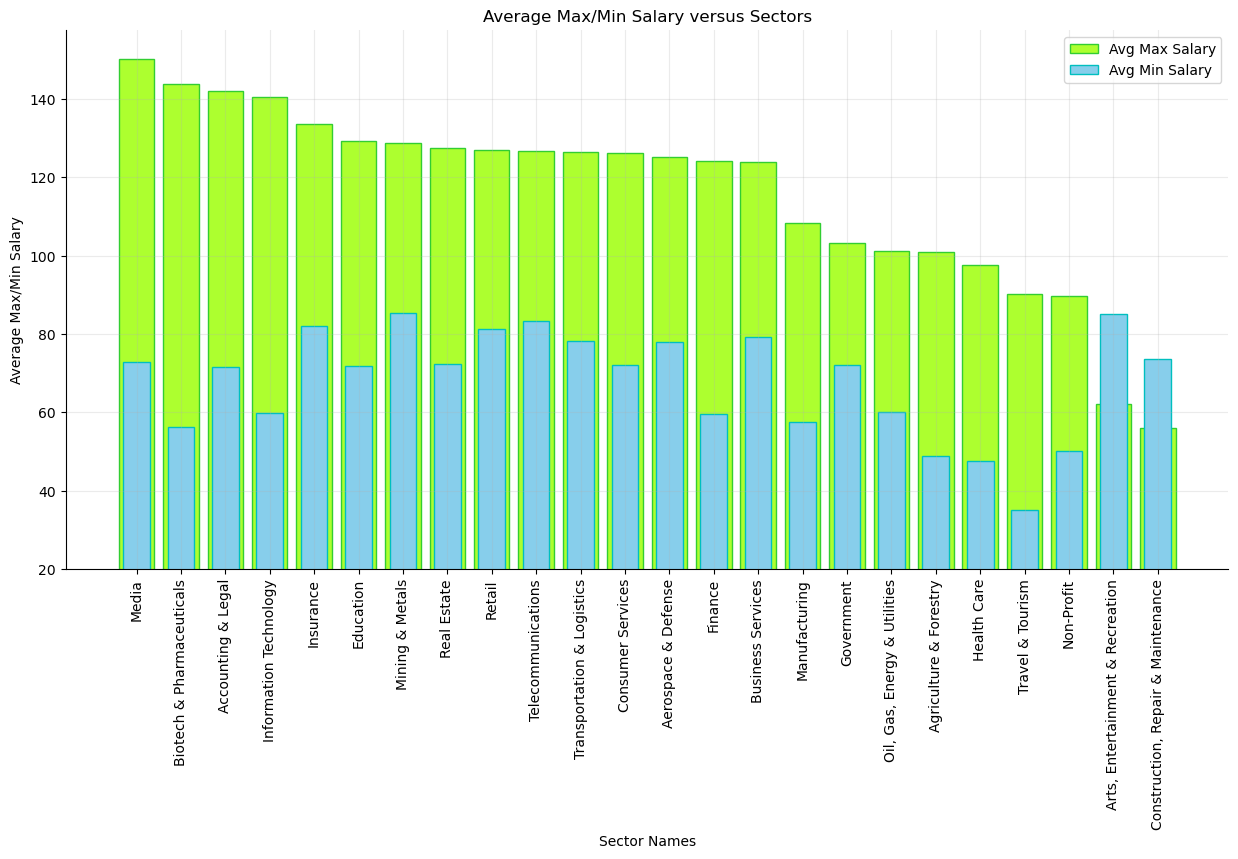

In [156]:

max_sal = round(glassdoor.groupby('Sector')['Max_Salary'].mean(), 1)  
cat_names = glassdoor['Sector'].unique() 

max_Sector_Sal = {cat: (max_sal[cat]) for cat in cat_names} # Dictionary

max_sorted_Sector_Sal = {r: max_Sector_Sal[r] for r in sorted(max_Sector_Sal, key=max_Sector_Sal.get, reverse=True)}
# print(max_sorted_Sector_Sal, '\n')

plt.rcParams["figure.figsize"] = (15,7)
bar_max = plt.bar(max_sorted_Sector_Sal.keys(), max_sorted_Sector_Sal.values(), color = 'greenyellow', edgecolor = 'limegreen', width=0.8)


min_sal = round(glassdoor.groupby('Sector')['Min_Salary'].mean(), 1)
min_Sector_Sal = {cat: (min_sal[cat]) for cat in cat_names}
min_sorted_Sector_Sal = {r: min_Sector_Sal[r] for r in sorted(min_Sector_Sal, key=max_sorted_Sector_Sal.get)}
bar_min = plt.bar(max_sorted_Sector_Sal.keys(), min_Sector_Sal.values(), color = 'skyblue', edgecolor = 'c', width=0.6)

plt.grid(True, alpha = 0.25)
plt.xlabel("Sector Names")
plt.ylabel("Average Max/Min Salary")
plt.ylim(ymin = 20)

plt.legend(handles=[bar_max, bar_min], labels=['Avg Max Salary', 'Avg Min Salary'])
plt.title("Average Max/Min Salary versus Sectors")
plt.xticks(rotation=90)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Bar Chart - Jobs in Each Sector

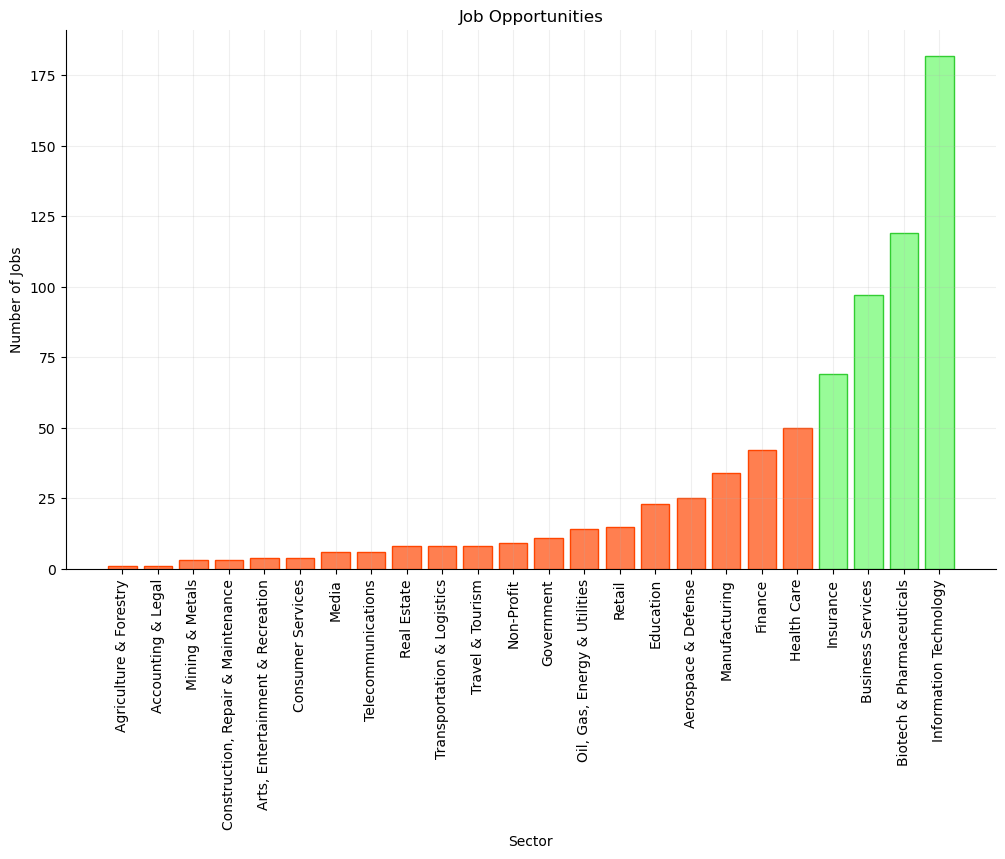

In [157]:

val_count = glassdoor['Sector'].value_counts()  
cat_names = glassdoor['Sector'].unique()  

Sector_count = {cat: glassdoor['Sector'].value_counts()[cat] for cat in cat_names}
# print(Sector_count)
sorted_Sector_count = {r: Sector_count[r] for r in sorted(Sector_count, key=Sector_count.get, reverse=True)}
# print(sorted_Sector_count, '\n')

plt.rcParams["figure.figsize"] = (12,7)

sorted_Sector_count_asc = dict(sorted(sorted_Sector_count.items(), key=lambda item: item[1]))

plt.bar(sorted_Sector_count_asc.keys(), sorted_Sector_count_asc.values(), color = 'coral', edgecolor = 'orangered')

# Color the top 4 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i > 19 and bar.get_height() > 60:
        bar.set_facecolor('palegreen')
        bar.set_edgecolor('limegreen')
    
plt.ylabel("Number of Jobs")
plt.xlabel("Sector")
plt.title("Job Opportunities")
plt.xticks(rotation = 90)
plt.grid(True, alpha = 0.2)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


### Bubble Plot - Job Salaries & Numbers By Sector

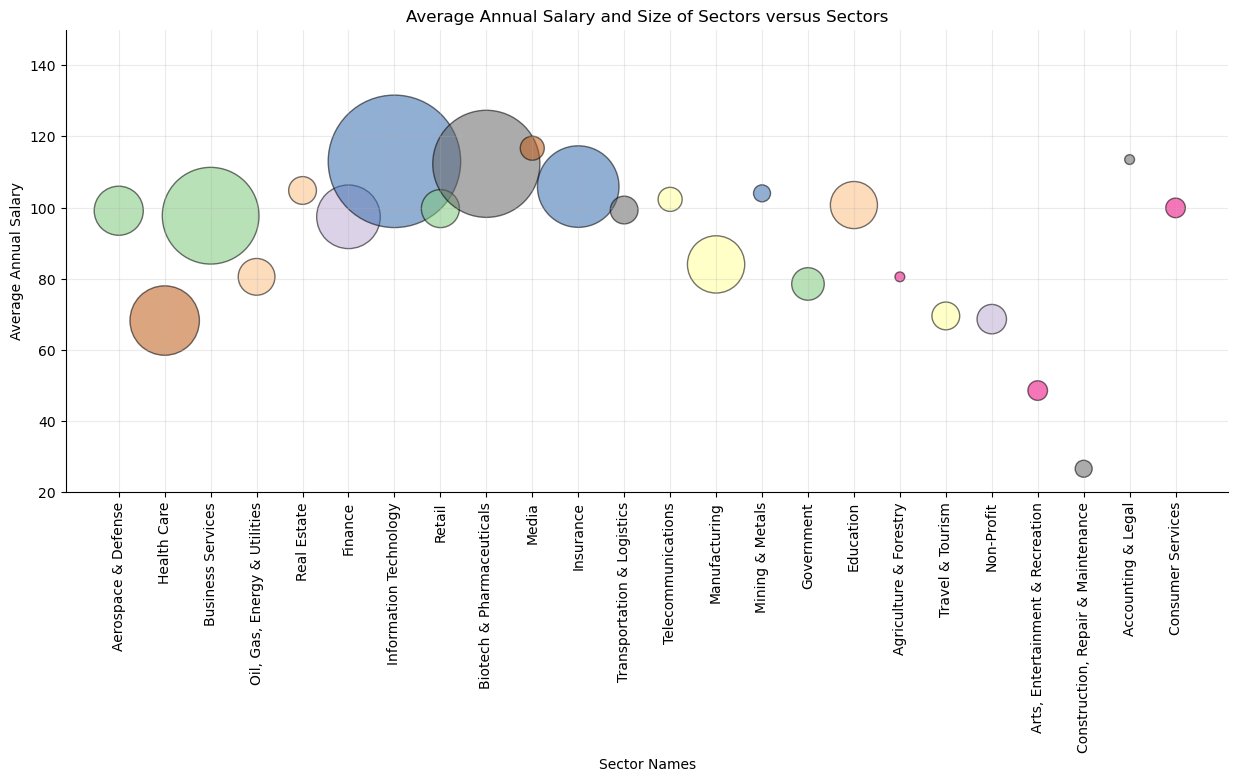

In [158]:

avg_sal = round(glassdoor.groupby('Sector')['Avg_Salary'].mean(), 1)   # Create dictionary (below) for y-axis values
val_count = glassdoor['Sector'].value_counts()  # Create dictionary (below) using value_counts()
cat_names = glassdoor['Sector'].unique()

Sector_count = {cat: val_count[cat] for cat in cat_names}  # Dictionary
# print(f'\nSector name and its frequency in data:\n{Sector_count} \n')

Sector_count_vals = [Sector_count[cat] for cat in Sector_count.keys()]
# print(Sector_count_vals)
scaled_Sector_count_vals = np.multiply(Sector_count_vals, 50)  # Scaled up by 50

Sector_Sal = {cat: (avg_sal[cat]) for cat in cat_names}
# print(f'Sector name and average salary from data:\n{Sector_Sal} \n')

colors = np.random.rand(len(cat_names))
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter(Sector_Sal.keys(), Sector_Sal.values(), s = scaled_Sector_count_vals, c = colors, cmap = 'Accent', edgecolors = 'k', alpha = 0.55)

plt.grid(True, alpha = 0.25)
plt.xlabel("Sector Names")
plt.ylabel("Average Annual Salary")
plt.ylim(ymin = 20, ymax = 150)

plt.title("Average Annual Salary and Size of Sectors versus Sectors")
plt.xticks(rotation=90)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Violin Plot - Salary Distribution By Title

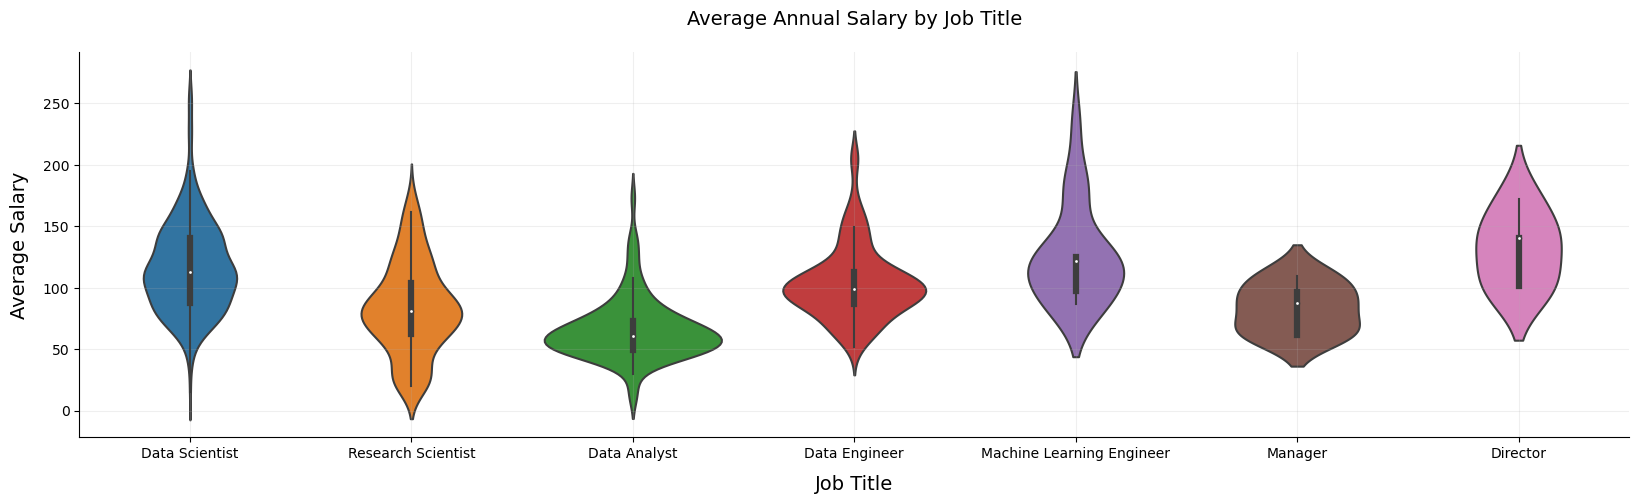

In [159]:

plt.figure(figsize=(20,5))
sns.violinplot(x = "Job_Title", y = "Avg_Salary", data = glassdoor)

plt.title("Average Annual Salary by Job Title", fontsize=14, pad=20)
plt.xlabel("Job Title", fontsize=14, labelpad=10)
plt.ylabel("Average Salary", fontsize=14, labelpad=10)
plt.grid(True, alpha = 0.2)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Bar Plot- Max/Min Salary by Job-Title

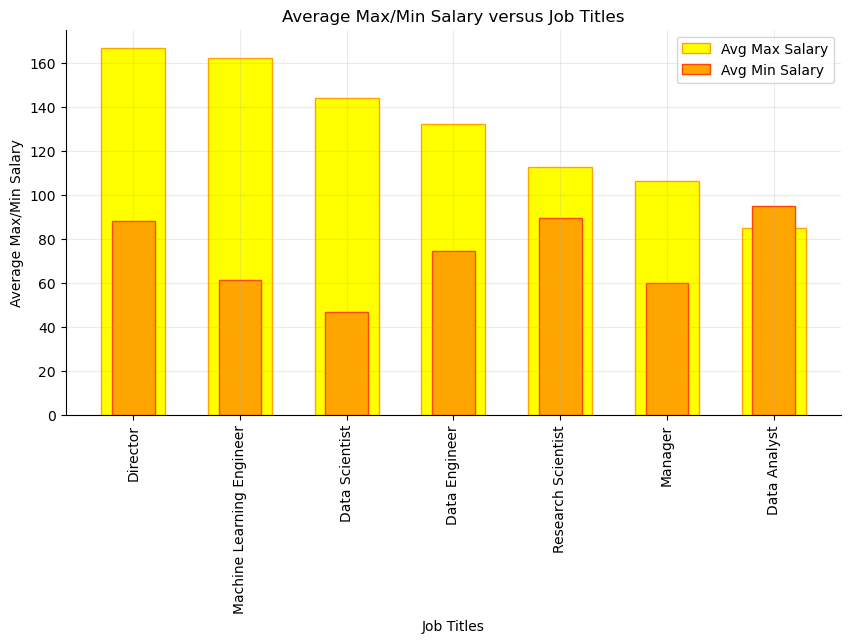

In [160]:

max_sal = round(glassdoor.groupby('Job_Title')['Max_Salary'].mean(), 1)  
cat_names = glassdoor['Job_Title'].unique() 

max_Title_Sal = {cat: (max_sal[cat]) for cat in cat_names} # Dictionary

max_sorted_Title_Sal = {r: max_Title_Sal[r] for r in sorted(max_Title_Sal, key=max_Title_Sal.get, reverse=True)}
# print(max_sorted_Title_Sal, '\n')

# Sort cat_names based on the order of max_sorted_Title_Sal
sorted_cat_names = sorted(cat_names, key=max_sorted_Title_Sal.get, reverse=True)

# Create a dictionary with sorted keys
Title_count = {cat: glassdoor['Job_Title'].value_counts()[cat] for cat in sorted_cat_names}
# print(Title_count)

plt.rcParams["figure.figsize"] = (10,5)
bar_max = plt.bar(max_sorted_Title_Sal.keys(), max_sorted_Title_Sal.values(), color = 'yellow', edgecolor = 'orange', width=0.6)

min_sal = round(glassdoor.groupby('Job_Title')['Min_Salary'].mean(), 1)
min_Title_Sal = {cat: (min_sal[cat]) for cat in cat_names}
min_sorted_Title_Sal = {r: min_Title_Sal[r] for r in sorted(min_Title_Sal, key=max_sorted_Title_Sal.get)}
bar_min = plt.bar(max_sorted_Title_Sal.keys(), min_Title_Sal.values(), color = 'orange', edgecolor = 'orangered', width=0.4)

plt.grid(True, alpha = 0.25)
plt.xlabel("Job Titles")
plt.ylabel("Average Max/Min Salary")

plt.legend(handles=[bar_max, bar_min], labels=['Avg Max Salary', 'Avg Min Salary'])

plt.title("Average Max/Min Salary versus Job Titles")
plt.xticks(rotation=90)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Bubble Plot - Job Salaries & Numbers By Titles

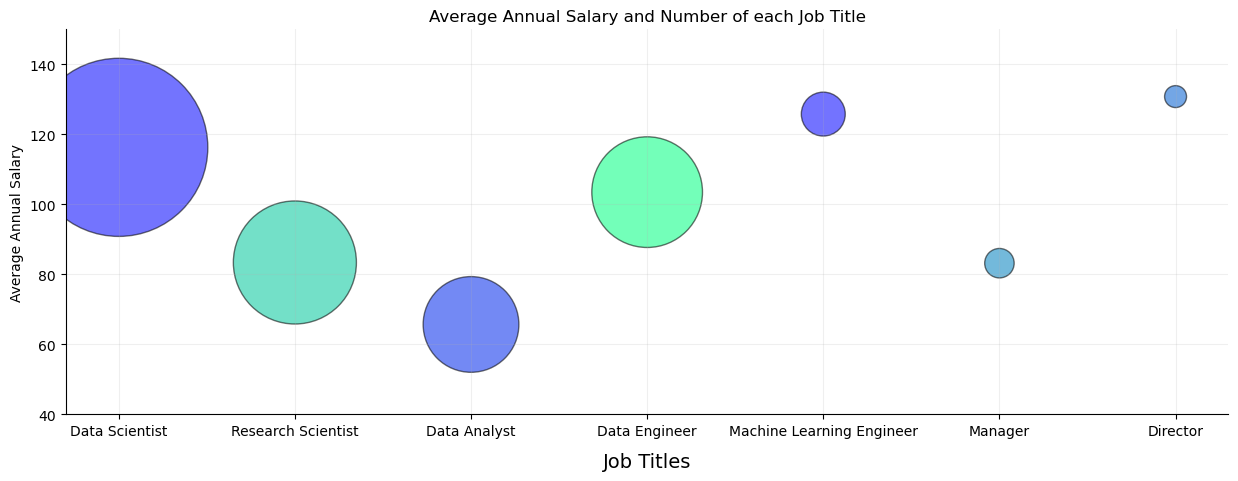

In [161]:

avg_sal = round(glassdoor.groupby('Job_Title')['Avg_Salary'].mean(), 1)   # Create dictionary (below) for y-axis values
val_count = glassdoor['Job_Title'].value_counts()  # Create dictionary (below) using value_counts()
cat_names = glassdoor['Job_Title'].unique()

Title_count = {cat: val_count[cat] for cat in cat_names}  # Dictionary

# print(f'\nJob Title count:\n{Title_count} \n')
Title_count_vals = [Title_count[cat] for cat in Title_count.keys()]

scaled_Title_count_vals = np.multiply(Title_count_vals, 50)  # Scaled up by 50

Title_Sal = {cat: (avg_sal[cat]) for cat in cat_names}
# print(f'Job Title and average salary from data:\n{Title_Sal} \n')

colors = np.random.rand(len(cat_names))
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(Title_Sal.keys(), Title_Sal.values(), s = scaled_Title_count_vals, c = colors, cmap = 'winter', edgecolors = 'k', alpha = 0.55)

plt.grid(True, alpha = 0.2)
plt.xlabel("Job Titles", fontsize=14, labelpad=10)
plt.ylabel("Average Annual Salary")
plt.ylim(ymin = 40, ymax = 150)

plt.title("Average Annual Salary and Number of each Job Title")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Bar Chart - Job Numbers By Sectors for Each Title

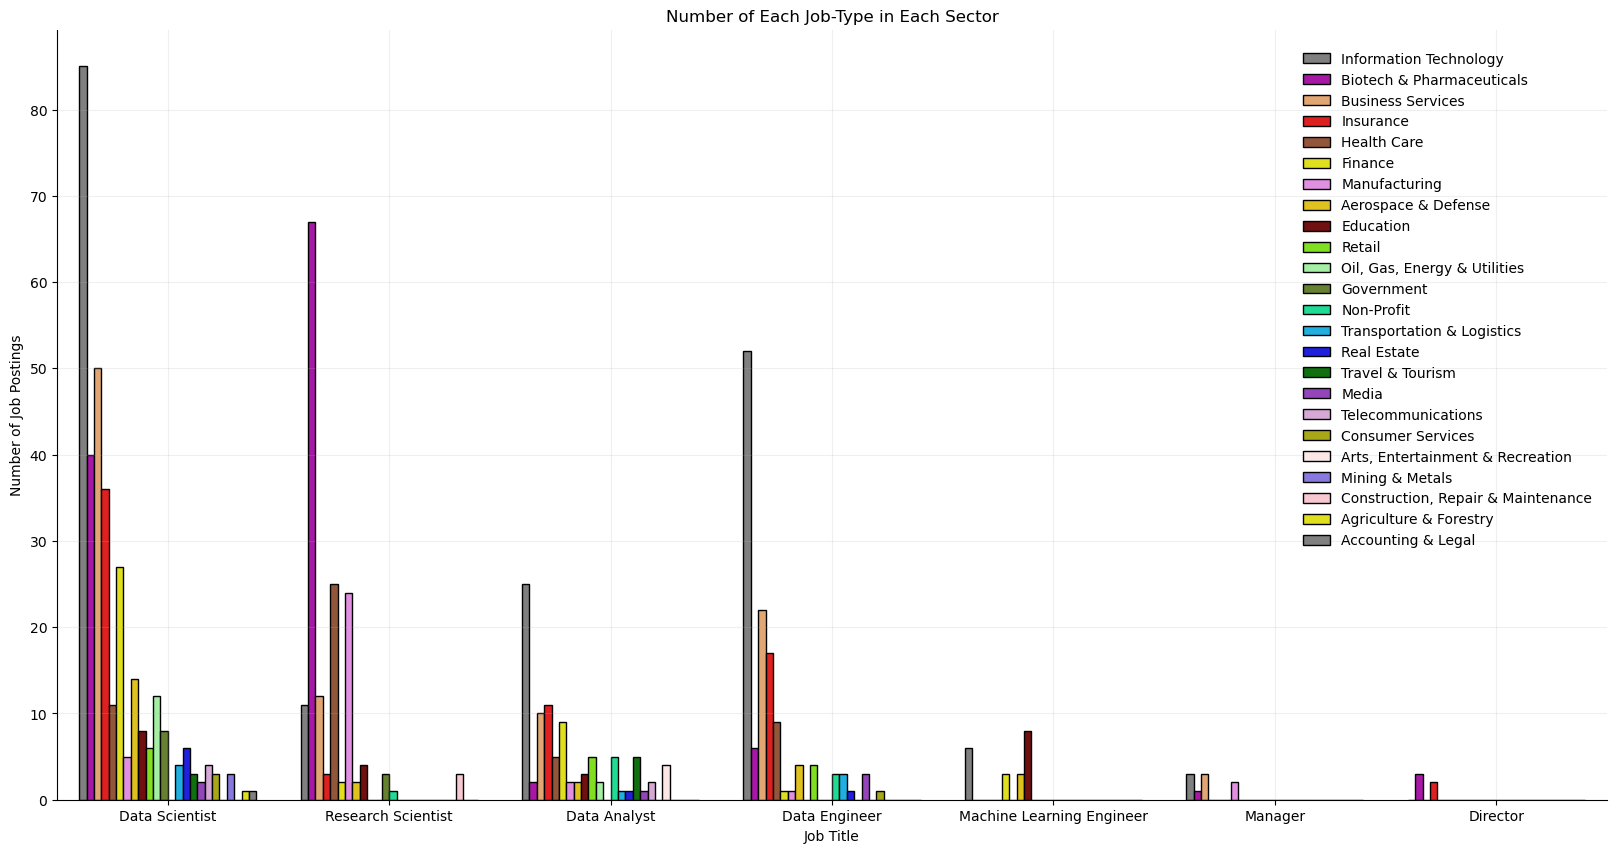

In [162]:

# count job titles within each sector
sector_job_counts = glassdoor.groupby(['Sector', 'Job_Title']).size().unstack(fill_value=0)

# Sort the data by total job counts within each sector in descending order
sorted_sectors = sector_job_counts.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(20,10))

# Create the countplot with the sorted sectors
sns.countplot(x='Job_Title', data=glassdoor, hue='Sector', edgecolor='k',
              palette=sns.color_palette(('gray', 'm', 'sandybrown', 'red', 'sienna',
                                         'yellow', 'violet', 'gold', 'maroon', 'chartreuse', 'palegreen',
                                         'olivedrab', 'mediumspringgreen', 'deepskyblue', 'blue', 'g',
                                         'darkorchid', 'plum', 'y', 'mistyrose', 'mediumslateblue', 'pink', 'yellow'),
                            n_colors=len(sorted_sectors)),
              hue_order=sorted_sectors)

plt.legend(loc=(0.8, 0.32), frameon=False)
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Each Job-Type in Each Sector")
plt.grid(True, alpha=0.2)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

### Bubble Plot - Company Age and User Rating

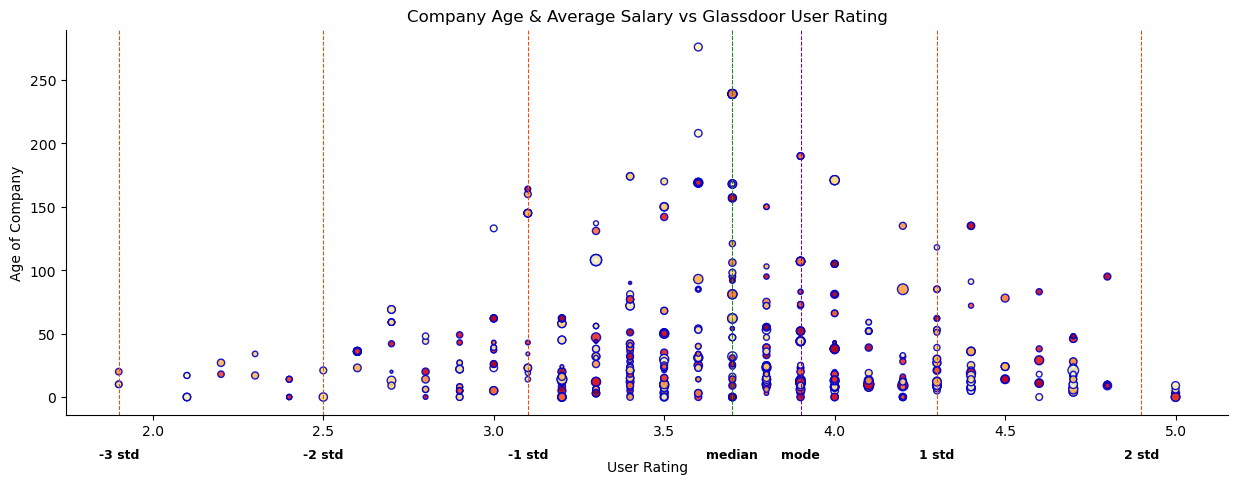

In [163]:

mask = glassdoor['Usr_Rating'] > 0

if mask.any():
    plt.rcParams["figure.figsize"] = (15, 5)
    dot_size = np.multiply(glassdoor[mask]['Avg_Salary'], 0.25)
    colors = np.random.rand(len(glassdoor[mask]['Sector']))
    
    plt.scatter(
    glassdoor[mask]['Usr_Rating'],
    glassdoor[mask]['Company_Age'],
    s=dot_size,
    c=colors,
    cmap='YlOrRd',    
    edgecolor='mediumblue',
    linewidths=1.0,  
    alpha=0.9
    )
    plt.xlabel("\nUser Rating")
    plt.ylabel("Age of Company")
    plt.title('Company Age & Average Salary vs Glassdoor User Rating')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    filtered_rating = glassdoor[mask]
    mean = round(filtered_rating['Usr_Rating'].mean(), 1)
    median = round(filtered_rating['Usr_Rating'].median(), 1)
    mode = round(filtered_rating['Usr_Rating'].mode(), 1)
    std = round(filtered_rating['Usr_Rating'].std(), 1)


    stat_param = {'': mean, 'median': median, 'mode': mode[0]}
    
    for i in range(-4, 2):
        if (i + 1) == 0:
            continue
        else:
            new_val = (mean + (i + 1) * std).round(1)
            new_key = f'{i + 1} std'
            stat_param[new_key] = new_val
    # print(stat_param, '\n')

    ln_clr = ['black', 'forestgreen', 'purple', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered']

    for i, (k, v) in enumerate(stat_param.items()):
        plt.axvline(v, color=ln_clr[i], linestyle='dashed', lw=0.75)
        plt.text(v, -40, k, color='k', ha='center', va='top', rotation=0, fontsize=9, weight='bold')

plt.show()


### Histogram - Company Age

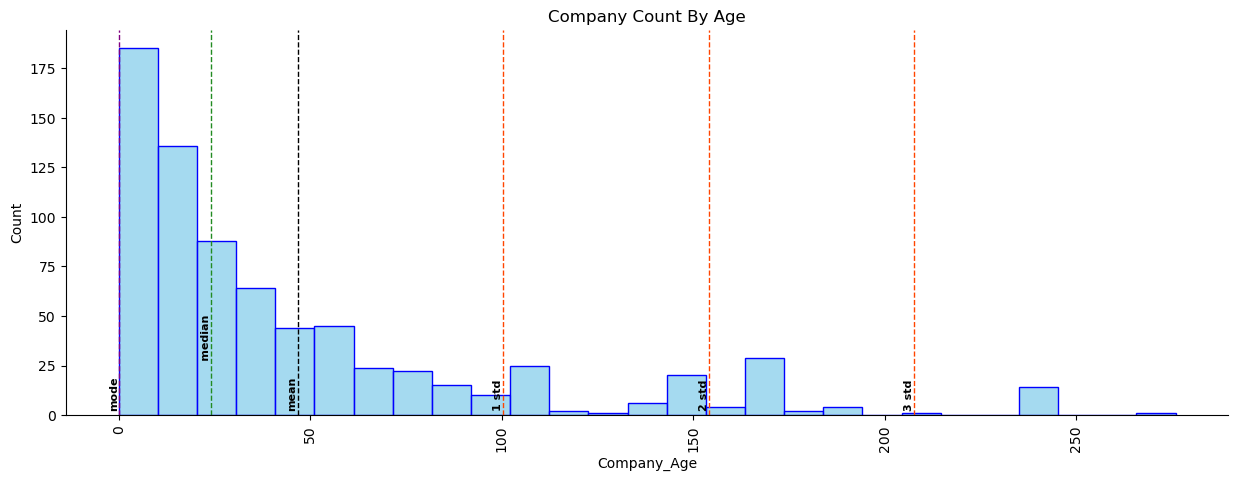

In [164]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.histplot(x = 'Company_Age', data = glassdoor, color = 'skyblue', edgecolor = 'blue')
plt.xticks(rotation=90)
plt.title('Company Count By Age')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

mean = round(glassdoor['Company_Age'].mean(), 1)
std = round(glassdoor['Company_Age'].std(), 1)
mode = round(glassdoor['Company_Age'].mode(), 1)
median = round(glassdoor['Company_Age'].median(), 1)
# print(f'Mean: {mean}, Median: {median}, Mode: {mode[0]}, Std: {std}')

stat_param = {'mean': mean, '             median': median, 'mode': mode[0]}

for i in range(3):
      new_val = (mean + (i+1)*std).round(1)
      new_key = f'{i+1} std'
      stat_param[new_key] = new_val
# print(stat_param)


ln_clr = ['black', 'forestgreen', 'purple', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered']

for i, (k, v) in enumerate(stat_param.items()):
    plt.axvline(v, color=ln_clr[i], linestyle='dashed', lw = 1.00)
    plt.text(v, 2, k, color='k', ha='right', va='bottom', rotation=90, fontsize=8, weight = 'bold')

# Salary Prediction Models

## Linear Regression

In [165]:
# Make copy for Linear Regresion Model
import copy
cpR_glassdoor = copy.deepcopy(glassdoor)

In [166]:
print(cpR_glassdoor.shape, '\n\n')
cpR_glassdoor.head()

(742, 16) 




job_state job_region                        Sector  Company_Age  \
0        NM  Southwest           Aerospace & Defense           47   
1        MD  Northeast                   Health Care           36   
2        FL  Southeast             Business Services           10   
3        WA       West  Oil, Gas, Energy & Utilities           55   
4        NY  Northeast             Business Services           22   

   Avg_Company_Revenue  Avg_Company_Size       Job_Title  Avg_Salary  \
0         7.500000e+07               750  Data Scientist        72.0   
1         3.000000e+09             10000  Data Scientist        87.5   
2         1.500000e+08               750  Data Scientist        85.0   
3         7.500000e+08              3000  Data Scientist        76.5   
4         1.500000e+08               125  Data Scientist       114.5   

   Min_Salary  Max_Salary  Usr_Rating  Python_y_n  R_y_n  Spark_y_n  AWS_y_n  \
0          53          91         3.8           1      0          0        0   
1          63         112         3.4           1      0          0        0   
2          80          90         4.8           1      0          1        0   
3          56          97         3.8           1      0          0        0   
4          86         143         2.9           1      0          0        0   

   Excel_y_n  
0          1  
1          0  
2          1  
3          0  
4          1

In [167]:
cpR_glassdoor.dtypes

job_state               object
job_region              object
Sector                  object
Company_Age              int64
Avg_Company_Revenue    float64
Avg_Company_Size         int64
Job_Title               object
Avg_Salary             float64
Min_Salary               int64
Max_Salary               int64
Usr_Rating             float64
Python_y_n               int64
R_y_n                    int64
Spark_y_n                int64
AWS_y_n                  int64
Excel_y_n                int64
dtype: object

### Histplot For Average Salary

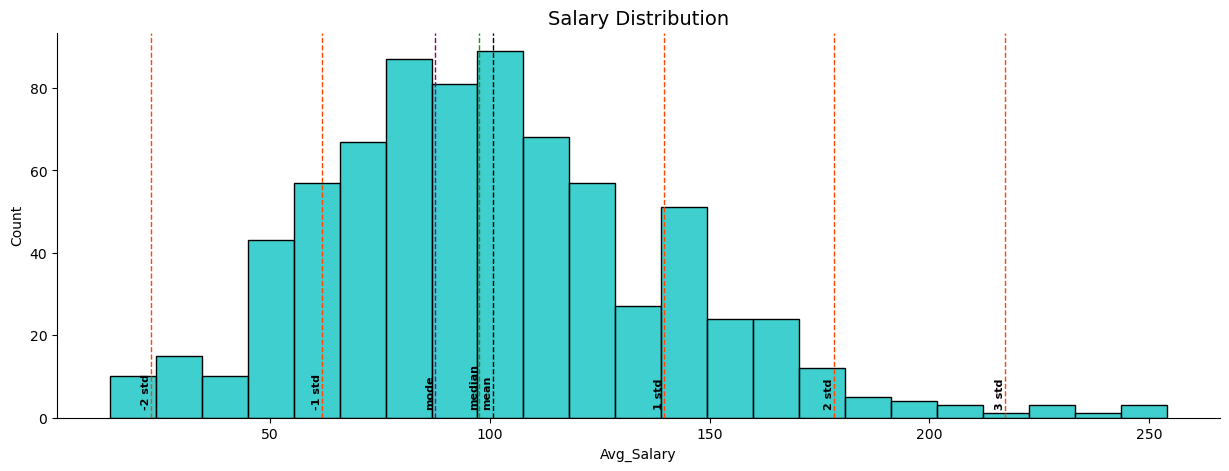

In [168]:

bins = []
bin = 0
while bin < 254:
    bin += 10
    bins.append(bin)
bins

plt.rcParams["figure.figsize"] = (15, 5)
sns.histplot(x = 'Avg_Salary', data = cpR_glassdoor, color = 'c', edgecolor = 'k')
plt.title('Salary Distribution', fontsize = 14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


mean = round(cpR_glassdoor['Avg_Salary'].mean(), 1)
std = round(cpR_glassdoor['Avg_Salary'].std(), 1)
mode = round(cpR_glassdoor['Avg_Salary'].mode(), 1)
median = round(cpR_glassdoor['Avg_Salary'].median(), 1)
# print(f'Mean: {mean}, Median: {median}, Mode: {mode[0]}, Std: {std}')

stat_param = {'mean': mean, 'median': median, 'mode': mode[0]}

for i in range(-3, 3):
    if (i+1) == 0:
        continue
    else:
        new_val = (mean + (i+1)*std).round(1)
        new_key = f'{i+1} std'
        stat_param[new_key] = new_val
# print(stat_param)

ln_clr = ['black', 'forestgreen', 'purple', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered']

for i, (k, v) in enumerate(stat_param.items()):

    plt.axvline(v, color=ln_clr[i], linestyle='dashed', lw = 1.00)
    plt.text(v, 2, k, color='k', ha='right', va='bottom', rotation=90, fontsize=8, weight = 'bold')
    

In [169]:
# Records for salaries beyond +3 std

cpR_mean = cpR_glassdoor['Avg_Salary'].mean().round(2)
cpR_std = round(cpR_glassdoor['Avg_Salary'].std(), 2)
# print(f'Average Value for salaries: {cpR_mean}\nStandard Deviation for salaries: {cpR_std}\
        # \nAverage + 3(Standard Deviation): {round(cpR_mean+cpR_std*3, 2)}')

sal_beyond_3std = cpR_glassdoor[cpR_glassdoor['Avg_Salary'] > round(cpR_mean+cpR_std*3, 2)] 
sal_beyond_3std


job_state job_region                  Sector  Company_Age  \
103        DC  Northeast       Business Services           85   
176        CA       West  Information Technology            3   
266        CA       West  Information Technology            3   
354        IL    Midwest               Insurance          108   
429        CA       West  Information Technology           21   
528        IL    Midwest               Insurance          108   
613        CA       West             Health Care            9   
708        IL    Midwest               Insurance          108   

     Avg_Company_Revenue  Avg_Company_Size                  Job_Title  \
103         1.500000e+08              3000             Data Scientist   
176         7.500000e+06               125             Data Scientist   
266         7.500000e+06               125             Data Scientist   
354         1.500000e+10             10000             Data Scientist   
429         1.500000e+09               750  Machine Learning Engineer   
528         1.500000e+10             10000             Data Scientist   
613         1.500000e+09               750             Data Scientist   
708         1.500000e+10             10000             Data Scientist   

     Avg_Salary  Min_Salary  Max_Salary  Usr_Rating  Python_y_n  R_y_n  \
103       237.5         200         275         4.2           1      0   
176       225.0         200         250         0.0           1      0   
266       225.0         200         250         0.0           1      0   
354       254.0         202         306         3.3           1      0   
429       232.5         176         289         4.7           1      0   
528       254.0         202         306         3.3           1      0   
613       221.5         171         272         4.2           1      0   
708       254.0         202         306         3.3           1      0   

     Spark_y_n  AWS_y_n  Excel_y_n  
103          0        0          1  
176          0        1          1  
266          0        1          1  
354          0        0          0  
429          0        0          0  
528          0        0          0  
613          0        0          1  
708          0        0          0

In [170]:
# Drop records for average salary > (mean + 3std)

cpR_glassdoor = cpR_glassdoor[(cpR_glassdoor['Avg_Salary'] <= (cpR_mean+3*cpR_std))]
cpR_glassdoor.shape


(734, 16)

In [171]:
# Number of each type of jobs
cpR_glassdoor['Job_Title'].value_counts()

Data Scientist               322
Research Scientist           157
Data Engineer                127
Data Analyst                  95
Machine Learning Engineer     19
Manager                        9
Director                       5
Name: Job_Title, dtype: int64

In [172]:
# Look at Job_Title value counts > 15

title = cpR_glassdoor['Job_Title'].value_counts()
title[title > 15]

cutoff_value = 15
print(title.iloc[5:].index, '\n\n')

# Create a list
titles_to_replace = title[title < cutoff_value].index.tolist()

# relabel values in 'Job_Title'
cpR_glassdoor['Job_Title'] = cpR_glassdoor['Job_Title'].apply(lambda x: 'Others' if x in titles_to_replace else x)

# Check to make sure binning was successful
cpR_glassdoor['Job_Title'].value_counts()

Index(['Manager', 'Director'], dtype='object') 




Data Scientist               322
Research Scientist           157
Data Engineer                127
Data Analyst                  95
Machine Learning Engineer     19
Others                        14
Name: Job_Title, dtype: int64

In [173]:
# Number of jobs in each sector
cpR_glassdoor['Sector'].value_counts()

Information Technology                179
Biotech & Pharmaceuticals             119
Business Services                      96
Insurance                              66
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
Non-Profit                              9
Real Estate                             8
Transportation & Logistics              8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry                  1
Accounting & Legal                

In [174]:
# Look at Sector value counts > 10

sector = cpR_glassdoor['Sector'].value_counts()
sector[sector > 10]

cutoff_value = 10
print(sector.iloc[12:].index, '\n\n')

# Create a list
sectors_to_replace = sector[sector < cutoff_value].index.tolist()

# relabel values in 'Sector'
cpR_glassdoor['Sector'] = cpR_glassdoor['Sector'].apply(lambda x: 'Others' if x in sectors_to_replace else x)

# Check to make sure binning was successful
cpR_glassdoor['Sector'].value_counts()

Index(['Non-Profit', 'Real Estate', 'Transportation & Logistics',
       'Travel & Tourism', 'Telecommunications', 'Media',
       'Arts, Entertainment & Recreation', 'Consumer Services',
       'Mining & Metals', 'Construction, Repair & Maintenance',
       'Agriculture & Forestry', 'Accounting & Legal'],
      dtype='object') 




Information Technology          179
Biotech & Pharmaceuticals       119
Business Services                96
Insurance                        66
Others                           61
Health Care                      49
Finance                          42
Manufacturing                    34
Aerospace & Defense              25
Education                        23
Retail                           15
Oil, Gas, Energy & Utilities     14
Government                       11
Name: Sector, dtype: int64

In [175]:
# Regions and jobs
cpR_glassdoor['job_region'].value_counts()

Northeast    282
West         196
Southeast    116
Midwest      100
Southwest     40
Name: job_region, dtype: int64

In [176]:
# 'job_region' is derived from 'job_state'
#  Dropping 'job_state' to reduce multicollinearity

display(cpR_glassdoor.dtypes)
cpR_glassdoor.drop(['job_state'], axis=1, inplace=True)


job_state               object
job_region              object
Sector                  object
Company_Age              int64
Avg_Company_Revenue    float64
Avg_Company_Size         int64
Job_Title               object
Avg_Salary             float64
Min_Salary               int64
Max_Salary               int64
Usr_Rating             float64
Python_y_n               int64
R_y_n                    int64
Spark_y_n                int64
AWS_y_n                  int64
Excel_y_n                int64
dtype: object

In [177]:

# Get Dummy values for categorical data 'job_region', 'Sector', 'Job_Title'
cpR_glassdoor = pd.get_dummies(cpR_glassdoor)

print(cpR_glassdoor.shape)
cpR_glassdoor.head()

(734, 36)


Company_Age  Avg_Company_Revenue  Avg_Company_Size  Avg_Salary  Min_Salary  \
0           47         7.500000e+07               750        72.0          53   
1           36         3.000000e+09             10000        87.5          63   
2           10         1.500000e+08               750        85.0          80   
3           55         7.500000e+08              3000        76.5          56   
4           22         1.500000e+08               125       114.5          86   

   Max_Salary  Usr_Rating  Python_y_n  R_y_n  Spark_y_n  AWS_y_n  Excel_y_n  \
0          91         3.8           1      0          0        0          1   
1         112         3.4           1      0          0        0          0   
2          90         4.8           1      0          1        0          1   
3          97         3.8           1      0          0        0          0   
4         143         2.9           1      0          0        0          1   

   job_region_Midwest  job_region_Northeast  job_region_Southeast  \
0                   0                     0                     0   
1                   0                     1                     0   
2                   0                     0                     1   
3                   0                     0                     0   
4                   0                     1                     0   

   job_region_Southwest  job_region_West  Sector_Aerospace & Defense  \
0                     1                0                           1   
1                     0                0                           0   
2                     0                0                           0   
3                     0                1                           0   
4                     0                0                           0   

   Sector_Biotech & Pharmaceuticals  Sector_Business Services  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         1   
3                                 0                         0   
4                                 0                         1   

   Sector_Education  Sector_Finance  Sector_Government  Sector_Health Care  \
0                 0               0                  0                   0   
1                 0               0                  0                   1   
2                 0               0                  0                   0   
3                 0               0                  0                   0   
4                 0               0                  0                   0   

   Sector_Information Technology  Sector_Insurance  Sector_Manufacturing  \
0                              0                 0                     0   
1                              0                 0                     0   
2                              0                 0                     0   
3                              0                 0                     0   
4                              0                 0                     0   

   Sector_Oil, Gas, Energy & Utilities  Sector_Others  Sector_Retail  \
0                                    0              0              0   
1                                    0              0              0   
2                                    0              0              0   
3                                    1              0              0   
4                                    0              0              0   

   Job_Title_Data Analyst  Job_Title_Data Engineer  Job_Title_Data Scientist  \
0                       0                        0                         1   
1                       0                        0                         1   
2                       0                        0                         1   
3                       0                        0                         1   
4                       0                  

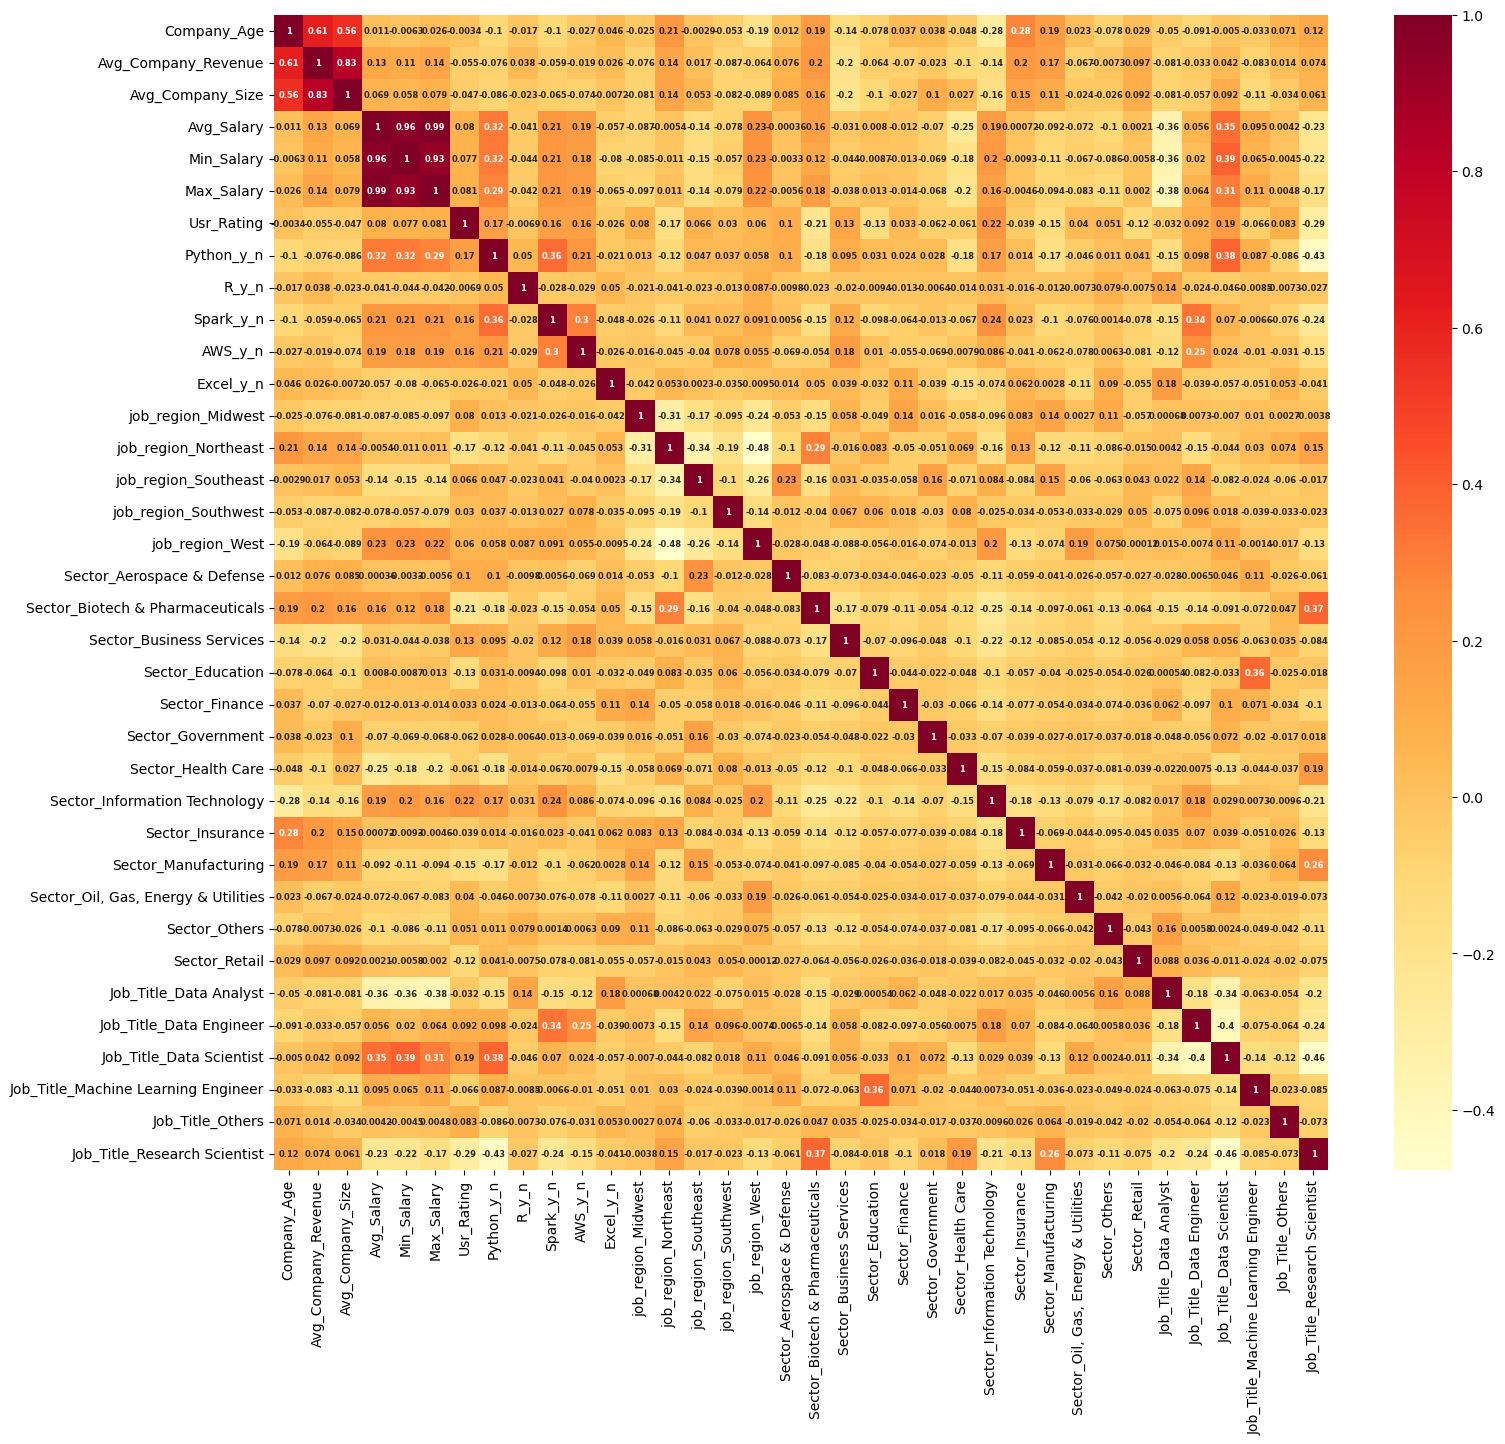

In [178]:
# Check for MultiCollinearity

# Correlation Matrix
cor_matrix = cpR_glassdoor.corr()

# Create heatmap
plt.rcParams["figure.figsize"] = (17,15)
sns.heatmap(cor_matrix, cmap = 'YlOrRd', annot=True, annot_kws={"fontsize": 6, "fontweight": "bold"})
plt.show()

In [179]:
# Dropping columns columns based on Correlation Matrix

cpR_glassdoor.drop(['Min_Salary', 'Max_Salary', 'Avg_Company_Size'], axis=1, inplace=True)
cpR_glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 741
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company_Age                          734 non-null    int64  
 1   Avg_Company_Revenue                  734 non-null    float64
 2   Avg_Salary                           734 non-null    float64
 3   Usr_Rating                           734 non-null    float64
 4   Python_y_n                           734 non-null    int64  
 5   R_y_n                                734 non-null    int64  
 6   Spark_y_n                            734 non-null    int64  
 7   AWS_y_n                              734 non-null    int64  
 8   Excel_y_n                            734 non-null    int64  
 9   job_region_Midwest                   734 non-null    uint8  
 10  job_region_Northeast                 734 non-null    uint8  
 11  job_region_Southeast            

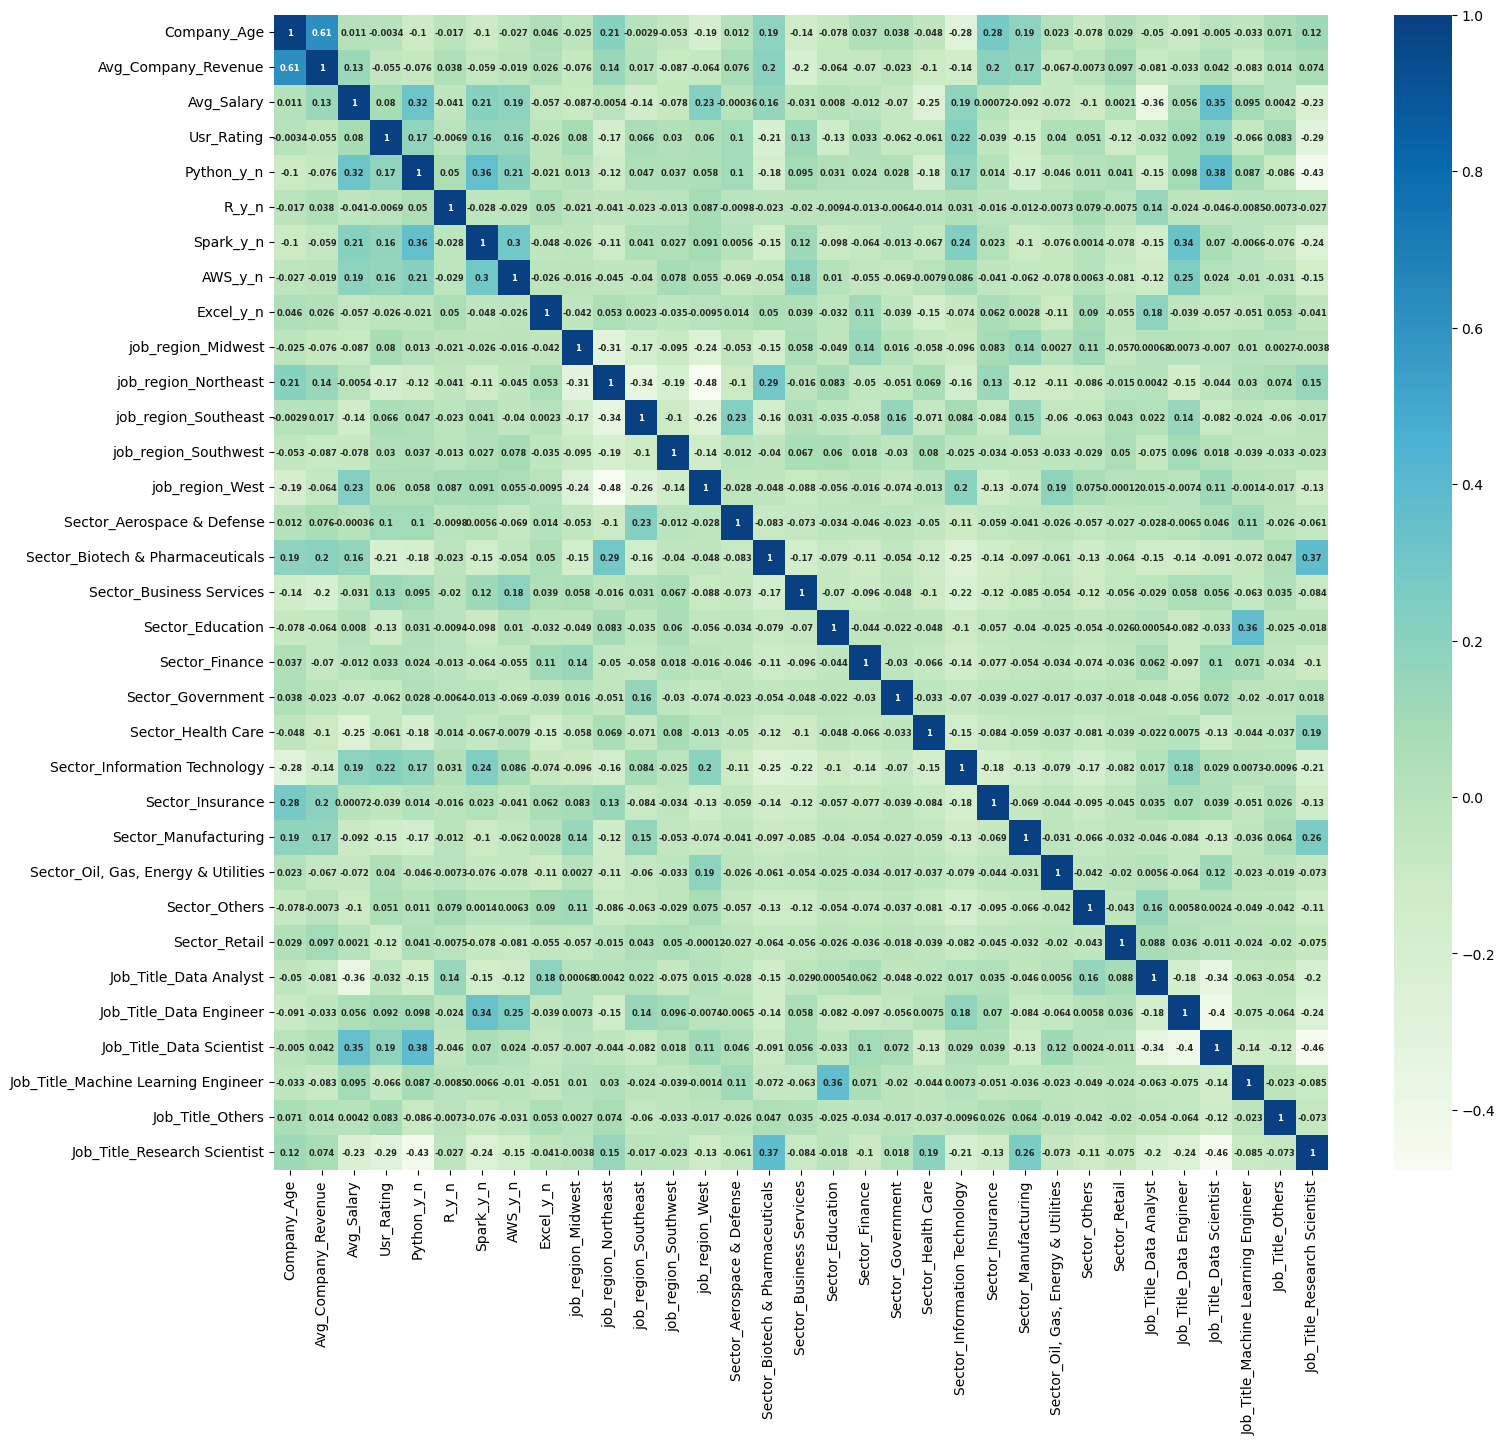

In [180]:
# Check for MultiCollinearity

# Correlation Matrix
cor_matrix = cpR_glassdoor.corr()

# Create heatmap
plt.rcParams["figure.figsize"] = (17,15)
sns.heatmap(cor_matrix, cmap = 'GnBu', annot=True, annot_kws={"fontsize": 6, "fontweight": "bold"})
plt.show()

In [181]:
cpR_glassdoor.rename({
             'Sector_Information Technology': 'Sector_Information_Technology',
             'Sector_Aerospace & Defense': 'Sector_Aerospace_Defense',
             'Sector_Biotech & Pharmaceuticals': 'Sector_Biotech_Pharmaceuticals',
             'Sector_Business Services': 'Sector_Business_Services',
             'Sector_Health Care': 'Sector_Health_Care',
             'Sector_Oil, Gas, Energy & Utilities': 'Sector_Oil_Gas_Energy_Utilities',
             'Job_Title_Data Scientist': 'Job_Title_Data_Scientist',
             'Job_Title_Data Analyst': 'Job_Title_Data_Analyst',
             'Job_Title_Data Engineer': 'Job_Title_Data_Engineer',
             'Job_Title_Machine Learning Engineer': 'Job_Title_Machine_Learning_Engineer',
             'Job_Title_Research Scientist': 'Job_Title_Research_Scientist'}
             , axis = 1, inplace = True)

# list(cpR_glassdoor.columns)

### OLS Modeling

In [182]:
# OLS Regression Model: Including all features

from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Avg_Salary ~ Company_Age + Avg_Company_Revenue + Usr_Rating + Python_y_n  + R_y_n + Spark_y_n + AWS_y_n + Excel_y_n + \
            job_region_West + job_region_Midwest + job_region_Northeast + job_region_Southeast + job_region_Southwest + \
            Sector_Aerospace_Defense + Sector_Biotech_Pharmaceuticals + Sector_Business_Services + Sector_Education + \
            Sector_Finance + Sector_Government + Sector_Health_Care + Sector_Others + Sector_Insurance + Sector_Information_Technology + \
            Sector_Manufacturing + Sector_Oil_Gas_Energy_Utilities + Sector_Retail + Job_Title_Data_Analyst + \
            Job_Title_Data_Scientist + Job_Title_Data_Engineer + Job_Title_Others + Job_Title_Machine_Learning_Engineer + \
            Job_Title_Research_Scientist', data = cpR_glassdoor).fit()

print(model.summary())

from statsmodels.stats.stattools import durbin_watson
print(f'\n\n\n******************\nDurbin-Watson Number: {durbin_watson(model.resid)}\n******************\n')

coeffs = model.params
coeffs_desc = coeffs.sort_values(ascending=False)
print(coeffs_desc, '\n')

                            OLS Regression Results                            
Dep. Variable:             Avg_Salary   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     17.59
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.72e-65
Time:                        10:53:42   Log-Likelihood:                -3477.0
No. Observations:                 734   AIC:                             7014.
Df Residuals:                     704   BIC:                             7152.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [183]:
# Dropping additional features (significant)

cpR_glassdoor.drop(['Job_Title_Data_Scientist', 'job_region_West', 'Sector_Information_Technology']\
                   , axis=1, inplace=True)
cpR_glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 741
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company_Age                          734 non-null    int64  
 1   Avg_Company_Revenue                  734 non-null    float64
 2   Avg_Salary                           734 non-null    float64
 3   Usr_Rating                           734 non-null    float64
 4   Python_y_n                           734 non-null    int64  
 5   R_y_n                                734 non-null    int64  
 6   Spark_y_n                            734 non-null    int64  
 7   AWS_y_n                              734 non-null    int64  
 8   Excel_y_n                            734 non-null    int64  
 9   job_region_Midwest                   734 non-null    uint8  
 10  job_region_Northeast                 734 non-null    uint8  
 11  job_region_Southeast            

In [184]:
# OLS Regression Model: Excluding features : 'Job_Title_Data_Scientist', 'job_region_West', 'Sector_Information_Technology'

from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Avg_Salary ~ Company_Age + Avg_Company_Revenue + Usr_Rating + Python_y_n  + R_y_n + Spark_y_n + AWS_y_n + Excel_y_n + \
            job_region_Midwest + job_region_Northeast + job_region_Southeast + job_region_Southwest + \
            Sector_Aerospace_Defense + Sector_Biotech_Pharmaceuticals + Sector_Business_Services + Sector_Education + \
            Sector_Finance + Sector_Government + Sector_Health_Care + Sector_Others + Sector_Insurance + \
            Sector_Manufacturing + Sector_Oil_Gas_Energy_Utilities + Sector_Retail + Job_Title_Data_Analyst + \
            Job_Title_Data_Engineer + Job_Title_Others + Job_Title_Machine_Learning_Engineer + \
            Job_Title_Research_Scientist', data = cpR_glassdoor).fit()

print(model.summary())

from statsmodels.stats.stattools import durbin_watson
print(f'\n\n\n******************\nDurbin-Watson Number: {durbin_watson(model.resid)}\n******************\n')

coeffs = model.params
coeffs_desc = coeffs.sort_values(ascending=False)
print(coeffs_desc, '\n')

                            OLS Regression Results                            
Dep. Variable:             Avg_Salary   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     17.59
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.72e-65
Time:                        10:53:42   Log-Likelihood:                -3477.0
No. Observations:                 734   AIC:                             7014.
Df Residuals:                     704   BIC:                             7152.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [185]:
# OLS Regression Model: Excluding features : 'Job_Title_Data_Scientist', 'job_region_West', 'Sector_Information_Technology'
# Excluding Additional features that have (P > |t|) >= 0.05 : 
# 'Company_Age', 'Usr_Rating', 'R_y_n', 'Excel_y_n', 'Spark_y_n', 'Sector_Aerospace_Defense', 'Sector_Education', 'Sector_Finance',
# 'Sector_Manufacturing', 'Sector_Insurance', 'Sector_Retail', 'Job_Title_Machine_Learning_Engineer', 'Job_Title_Others'

from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Avg_Salary ~ Avg_Company_Revenue + Python_y_n  + AWS_y_n + job_region_Midwest + job_region_Northeast + \
            job_region_Southeast + job_region_Southwest + Sector_Biotech_Pharmaceuticals + Sector_Business_Services + \
            Sector_Government + Sector_Health_Care + Sector_Others + Sector_Oil_Gas_Energy_Utilities + Job_Title_Data_Analyst + \
            Job_Title_Data_Engineer + Job_Title_Research_Scientist', data = cpR_glassdoor).fit()

print(model.summary())

from statsmodels.stats.stattools import durbin_watson
print(f'\n\n\n******************\nDurbin-Watson Number: {durbin_watson(model.resid)}\n******************\n')

coeffs = model.params
coeffs_desc = coeffs.sort_values(ascending=False)
print(coeffs_desc, '\n')

                            OLS Regression Results                            
Dep. Variable:             Avg_Salary   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     30.78
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.20e-70
Time:                        10:53:42   Log-Likelihood:                -3485.1
No. Observations:                 734   AIC:                             7004.
Df Residuals:                     717   BIC:                             7082.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Split data into training and testing data

In [186]:
# Separate the data into labels and features

# y variable, the label
y = cpR_glassdoor['Avg_Salary']
print(f'\ny label: {y.name}\n')
print(y[:5], '\n')


# X variable, the features; only excluding features: 
# 'Job_Title_Data_Scientist', 'job_region_West', 'Sector_Information_Technology'

X = cpR_glassdoor.copy()
X.drop('Avg_Salary', axis=1, inplace=True)
print(f'X Shape: {X.shape}\nX Columns:')
list(X.columns)



y label: Avg_Salary

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: Avg_Salary, dtype: float64 

X Shape: (734, 29)
X Columns:


['Company_Age',
 'Avg_Company_Revenue',
 'Usr_Rating',
 'Python_y_n',
 'R_y_n',
 'Spark_y_n',
 'AWS_y_n',
 'Excel_y_n',
 'job_region_Midwest',
 'job_region_Northeast',
 'job_region_Southeast',
 'job_region_Southwest',
 'Sector_Aerospace_Defense',
 'Sector_Biotech_Pharmaceuticals',
 'Sector_Business_Services',
 'Sector_Education',
 'Sector_Finance',
 'Sector_Government',
 'Sector_Health_Care',
 'Sector_Insurance',
 'Sector_Manufacturing',
 'Sector_Oil_Gas_Energy_Utilities',
 'Sector_Others',
 'Sector_Retail',
 'Job_Title_Data_Analyst',
 'Job_Title_Data_Engineer',
 'Job_Title_Machine_Learning_Engineer',
 'Job_Title_Others',
 'Job_Title_Research_Scientist']

In [187]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78)

### Linear Regression Modeling with Training Data

In [188]:
# Import linear regression model
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression()

# Fit the linear regression model
lin_reg.fit(X_train, y_train)

# Predict values with given 'train' set
predictions = lin_reg.predict(X_train)


In [189]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# mean absolute error
print('Objective: Low MAE value.')
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions))

# mean squared error - uses absolute value of the error
print('\nLow value, a measure of closeness between forecast and actual value.')
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions))

# root mean squared error -  deviation of predicted results from actual number
print('\nRoot Mean Square Error (Square Root of MSE).')
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions)))

# Evaluate R2-square ~41.4% (Moderately good?!)
print('\nAccuracy of prediction')
print("R2-Square:", r2_score(y_train, predictions))


Objective: Low MAE value.
Mean Absolute Error(MAE): 21.742971666193142

Low value, a measure of closeness between forecast and actual value.
Mean Squared Error(MSE): 736.4403373164268

Root Mean Square Error (Square Root of MSE).
RMSE: 27.13743424342889

Accuracy of prediction
R2-Square: 0.41385615595816316


### Linear Regression Modeling with Testing Data

In [190]:
# Predict values with given 'test' set
predictions = lin_reg.predict(X_test)

In [191]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# mean absolute error
print('Objective: Low MAE value.')
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))

# mean squared error - uses absolute value of the error
print('\nLow value, a measure of closeness between forecast and actual value.')
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))

# root mean squared error -  deviation of predicted results from actual number
print('\nSquare Root of MSE.')
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))

# Evaluate R2-square ~39.8% (Moderately good?!)
print('\nAccuracy of prediction')
print("R2-Square:", r2_score(y_test, predictions))

Objective: Low MAE value.
Mean Absolute Error(MAE): 24.075180256084344

Low value, a measure of closeness between forecast and actual value.
Mean Squared Error(MSE): 895.6745684162366

Square Root of MSE.
Root Mean Squared Error(RMSE): 29.92782264743355

Accuracy of prediction
R2-Square: 0.39813978835386765


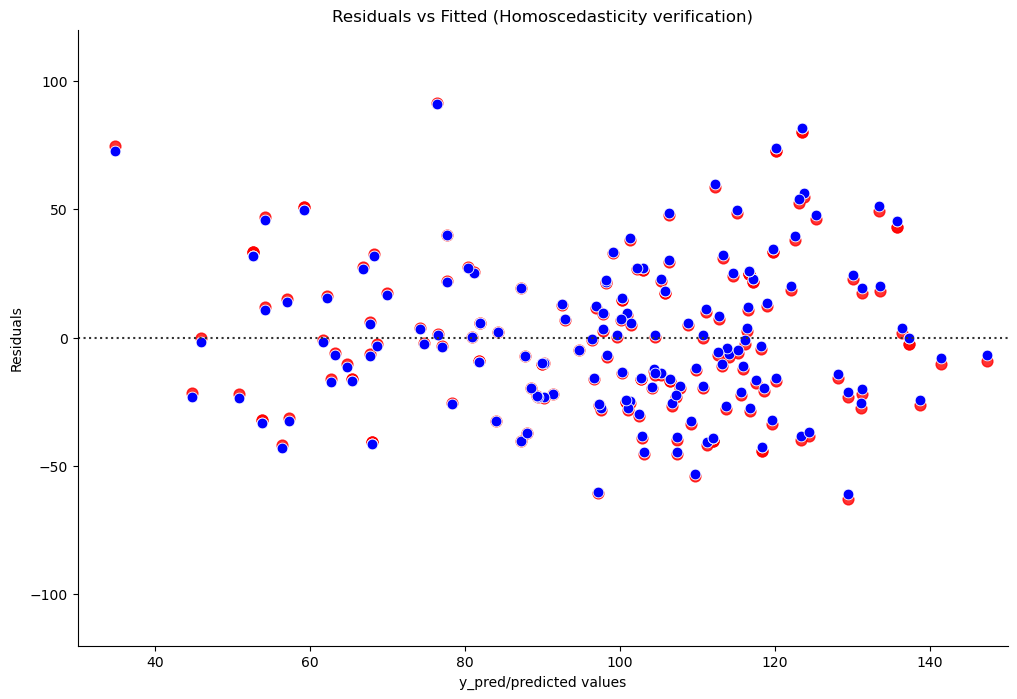

In [192]:
# HOMOSCEDASTICITY

# Pandas 'series' of the difference between y-test and predictions
residuals = y_test - predictions


# plot of predicted values vs error or residuals
plt.rcParams["figure.figsize"] = (12,8)

ax = sns.residplot(x=predictions, y=residuals, scatter_kws={"s": 60}, color = 'red')
ax.set_title('Residuals vs Fitted (Homoscedasticity verification)')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

p = sns.scatterplot(x=predictions, y=residuals, s=60, color = 'blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-120,120)
plt.xlim(30,150)

p = sns.lineplot(x=[0,26],y=[0,0], lw = .25, color='royalblue')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

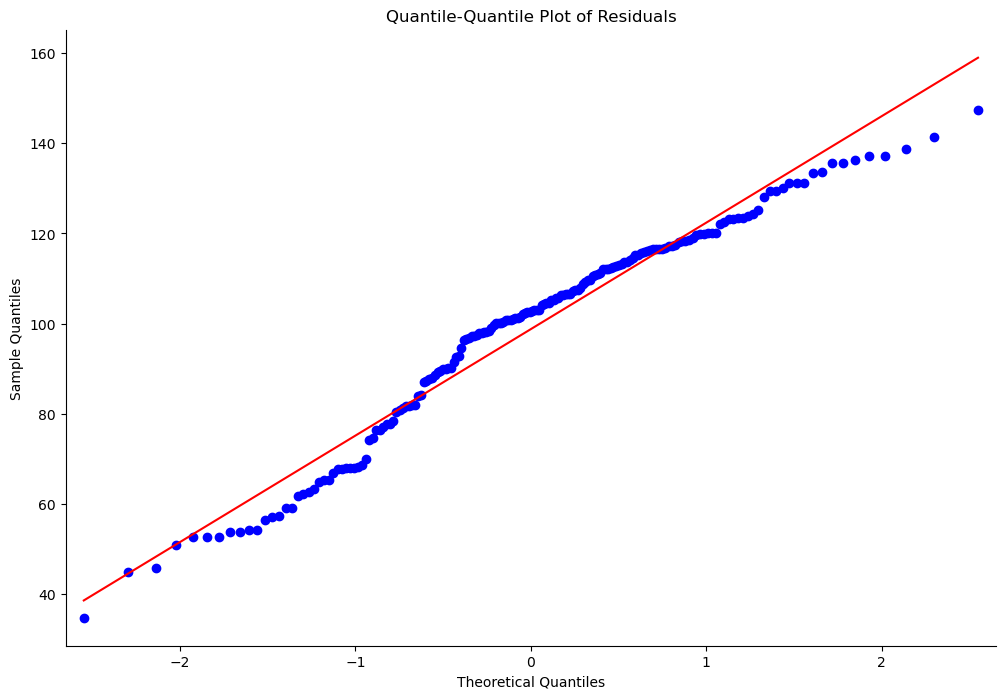


Mean of Residuals 0.529890460850368




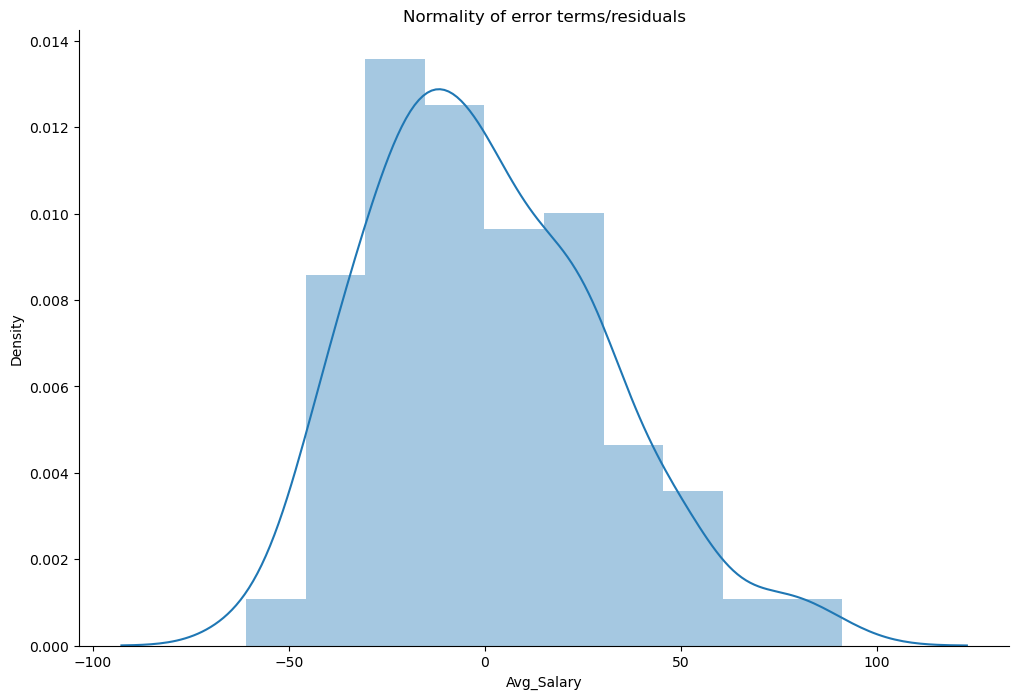

In [193]:
# NORMALITY OF RESIDUALS

# Q-Q plot. https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
# https://stackoverflow.com/questions/48009614/quantile-quantile-plot-using-python-statsmodels-api

import numpy as np
import statsmodels.api as sm
import pylab as py

plt.rcParams["figure.figsize"] = (12,8)

sm.qqplot(predictions, line ='r', markerfacecolor='blue', markeredgecolor='b', markersize = 6)
plt.title('Quantile-Quantile Plot of Residuals')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
py.show()

# The mean of the residuals should be close to 0
mean_residuals = np.mean(residuals)
print(f'\nMean of Residuals {mean_residuals}\n\n')

# Distplot()
plt.rcParams["figure.figsize"] = (12,8)
p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

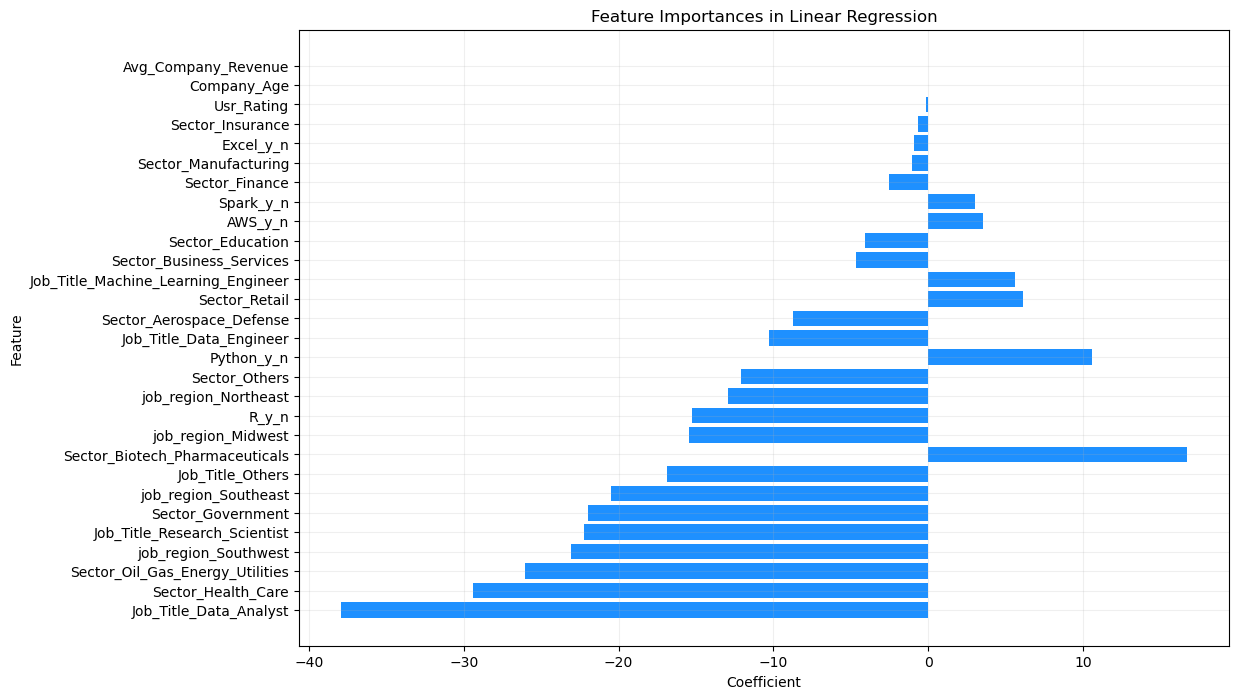

                            Feature  Coefficient  Absolute_Coefficient
24           Job_Title_Data_Analyst   -37.926771             37.926771
18               Sector_Health_Care   -29.404993             29.404993
21  Sector_Oil_Gas_Energy_Utilities   -26.020263             26.020263
11             job_region_Southwest   -23.108525             23.108525
28     Job_Title_Research_Scientist   -22.254652             22.254652


In [194]:
# Visualize the features by importance
# Get the coefficients from feature names in OLS

coefficients = lin_reg.coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
fi = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
fi['Absolute_Coefficient'] = fi['Coefficient'].abs()

# Sort the DataFrame by the absolute values of the coefficients
fi = fi.sort_values(by='Absolute_Coefficient', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(fi['Feature'], fi['Coefficient'], color='dodgerblue')

plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances in Linear Regression')
plt.grid('white', alpha = 0.2)
plt.show()

# Display the DataFrame
print(fi.head())

## Linear Regression Model with decision Tree

In [195]:
# Separate the data into labels and features

# y = cpR_glassdoor['Avg_Salary']
print(f'\ny label: {y.name}\n')
print(f'{y[:5]}\n\n')

# List the X variable, the features
print(f'X_Columns:\n\n{list(X.columns)}\n')


y label: Avg_Salary

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: Avg_Salary, dtype: float64


X_Columns:

['Company_Age', 'Avg_Company_Revenue', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n', 'job_region_Midwest', 'job_region_Northeast', 'job_region_Southeast', 'job_region_Southwest', 'Sector_Aerospace_Defense', 'Sector_Biotech_Pharmaceuticals', 'Sector_Business_Services', 'Sector_Education', 'Sector_Finance', 'Sector_Government', 'Sector_Health_Care', 'Sector_Insurance', 'Sector_Manufacturing', 'Sector_Oil_Gas_Energy_Utilities', 'Sector_Others', 'Sector_Retail', 'Job_Title_Data_Analyst', 'Job_Title_Data_Engineer', 'Job_Title_Machine_Learning_Engineer', 'Job_Title_Others', 'Job_Title_Research_Scientist']



In [196]:
# Train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78)

# Check the shape of X_
print(X_train.shape, X_test.shape)


(550, 29) (184, 29)


### Decision Tree Regression Modeling with Training Data

In [197]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Creating a decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=10)

# Fitting the regressor to the data
tree_regressor.fit(X_train, y_train)

# Predicting with the regressor
y_pred = tree_regressor.predict(X_train)


In [198]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# mean absolute error
print('Objective: Low MAE value.')
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,y_pred))

# mean squared error - uses absolute value of the error
print('\nLow value, a measure of closeness between forecast and actual value.')
print("Mean Squared Error(MSE):", mean_squared_error(y_train, y_pred))

# root mean squared error -  deviation of predicted results from actual number
print('\nSquare Root of MSE.')
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, y_pred)))

# Evaluate R2-square ~ 66.4% (Better than Linear Regression Model?!)
print('\nAccuracy of prediction')
print("R2-Square:", r2_score(y_train, y_pred))

Objective: Low MAE value.
Mean Absolute Error(MAE): 9.35840464429454

Low value, a measure of closeness between forecast and actual value.
Mean Squared Error(MSE): 250.6309650680412

Square Root of MSE.
Root Mean Squared Error(RMSE): 15.831328594531831

Accuracy of prediction
R2-Square: 0.8005190782511742


### Decision Tree Regression Modeling with Testing Data

In [199]:
# Predicting with the regressor
y_pred = tree_regressor.predict(X_test)

In [200]:

# mean absolute error
print('Objective: Low MAE value.')
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,y_pred))

# mean squared error - uses absolute value of the error
print('\nLow value, a measure of closeness between forecast and actual value.')
print("Mean Squared Error(MSE):", mean_squared_error(y_test, y_pred))

# root mean squared error -  deviation of predicted results from actual number
print('\nSquare Root of MSE.')
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluate R2-square ~ 45.8% (Better than Linear Regression Model?!)
print('\nAccuracy of prediction')
print("R2-Square:", r2_score(y_test, y_pred))

Objective: Low MAE value.
Mean Absolute Error(MAE): 18.103614398472292

Low value, a measure of closeness between forecast and actual value.
Mean Squared Error(MSE): 665.1910718190862

Square Root of MSE.
Root Mean Squared Error(RMSE): 25.791298374046356

Accuracy of prediction
R2-Square: 0.5530161808902653


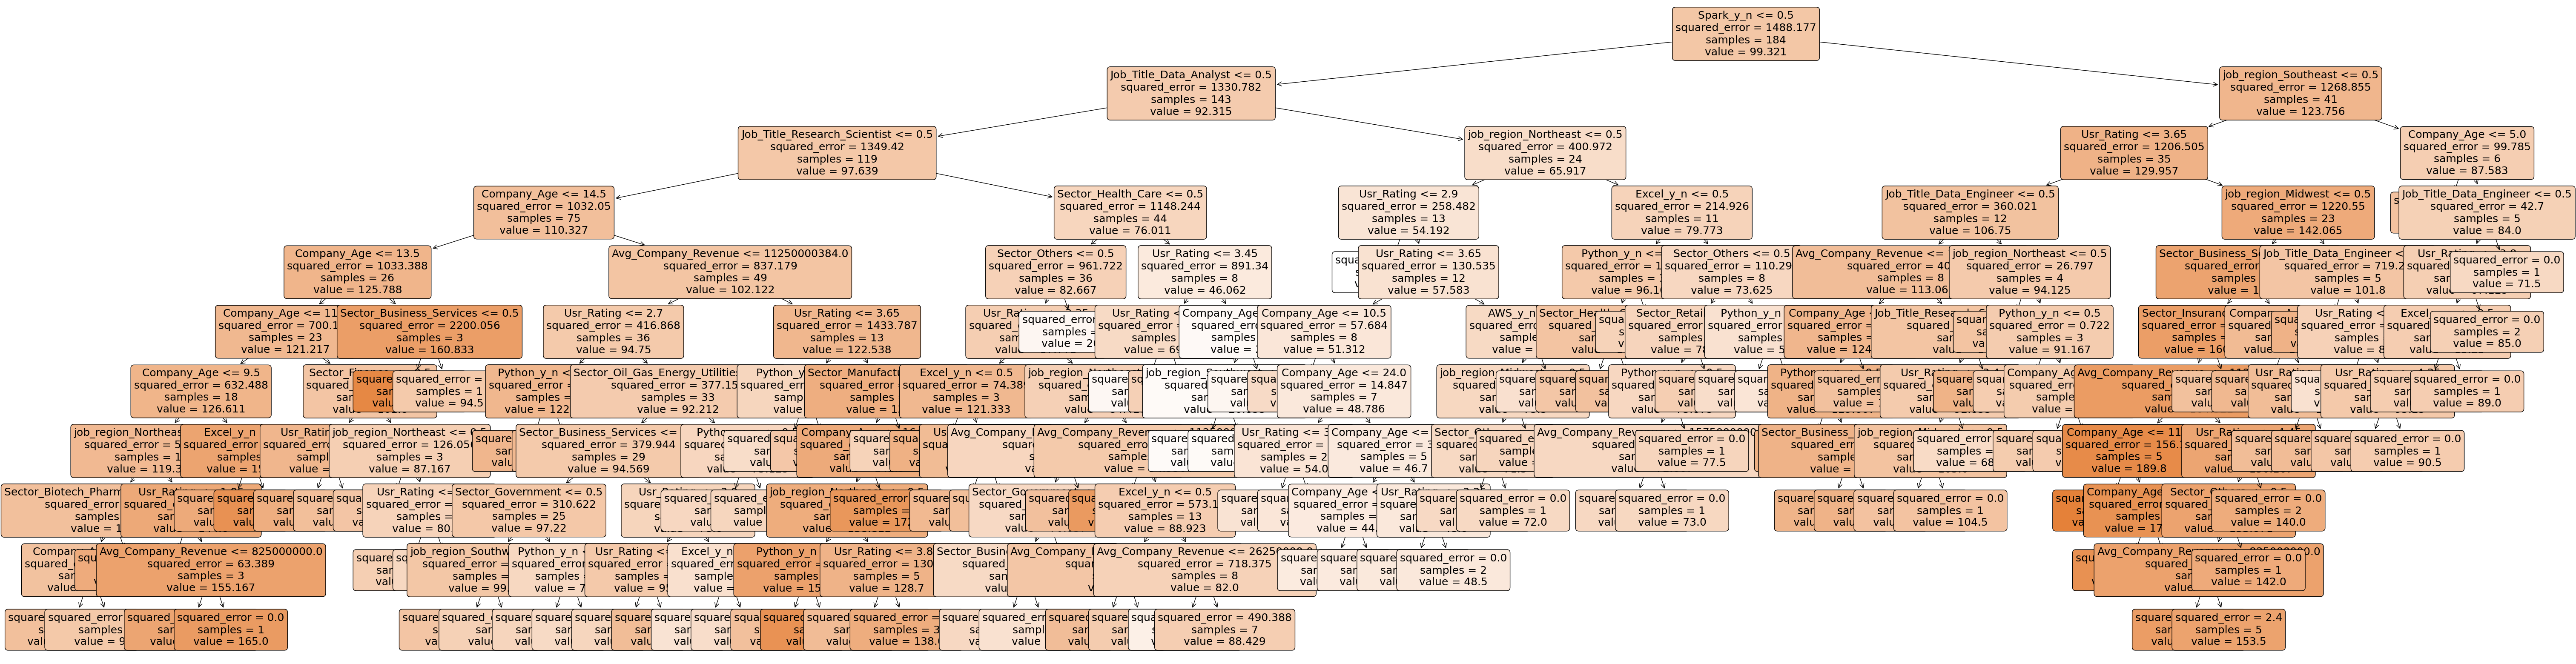

In [201]:
from sklearn import tree
from sklearn.tree import plot_tree

# Creating a decision tree regressor
tree_regressor = DecisionTreeRegressor(max_depth=10)

# Fitting the regressor to the training data
tree_regressor.fit(X_test, y_test)

plt.figure(figsize=(75,20)) 
node_kwargs = {'edgecolor': 'k'}
Data_Jobs_tree = tree.plot_tree(tree_regressor, feature_names=list(X.columns), filled=True, rounded = True, fontsize=18)

for node in Data_Jobs_tree:
    box = node.get_bbox_patch()
    box.set_edgecolor('k')
    



In [202]:
# text_representation
text_representation = tree.export_text(tree_regressor, feature_names=list(X.columns))
print('\n\n', text_representation)



 |--- Spark_y_n <= 0.50
|   |--- Job_Title_Data_Analyst <= 0.50
|   |   |--- Job_Title_Research_Scientist <= 0.50
|   |   |   |--- Company_Age <= 14.50
|   |   |   |   |--- Company_Age <= 13.50
|   |   |   |   |   |--- Company_Age <= 11.50
|   |   |   |   |   |   |--- Company_Age <= 9.50
|   |   |   |   |   |   |   |--- job_region_Northeast <= 0.50
|   |   |   |   |   |   |   |   |--- Sector_Biotech_Pharmaceuticals <= 0.50
|   |   |   |   |   |   |   |   |   |--- Company_Age <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- value: [108.93]
|   |   |   |   |   |   |   |   |   |--- Company_Age >  8.50
|   |   |   |   |   |   |   |   |   |   |--- value: [96.25]
|   |   |   |   |   |   |   |   |--- Sector_Biotech_Pharmaceuticals >  0.50
|   |   |   |   |   |   |   |   |   |--- value: [140.50]
|   |   |   |   |   |   |   |--- job_region_Northeast >  0.50
|   |   |   |   |   |   |   |   |--- Usr_Rating <= 1.95
|   |   |   |   |   |   |   |   |   |--- value: [110.50]
|   |   |   |   |   

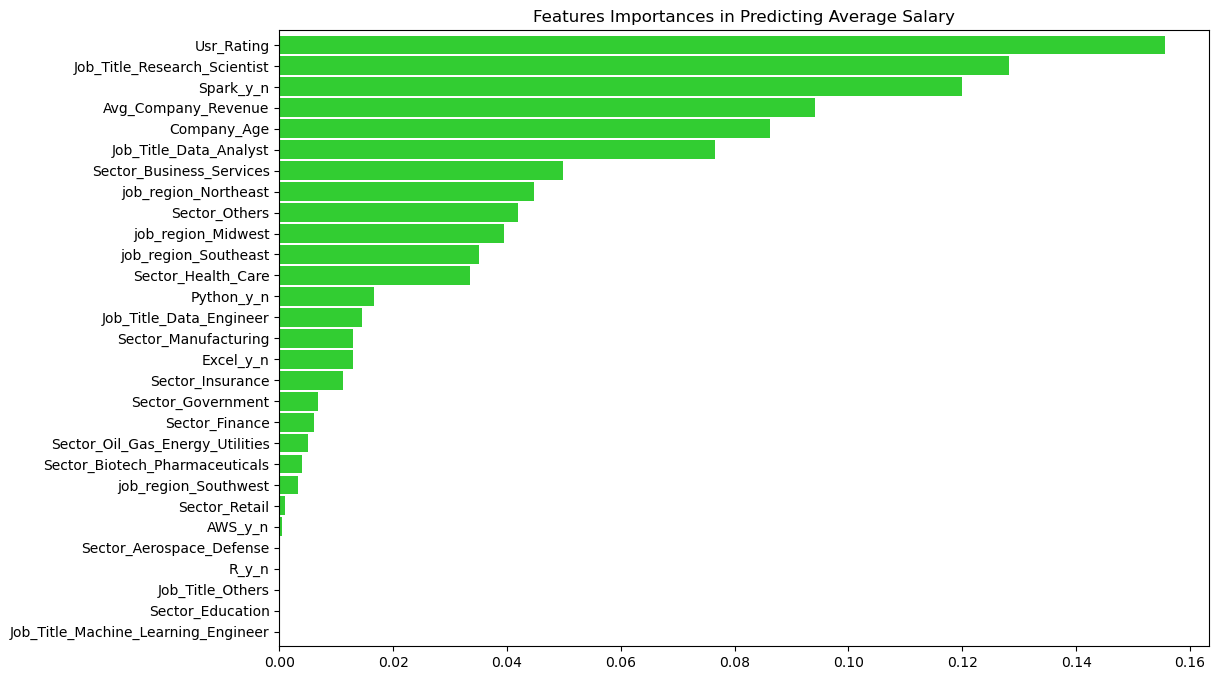

In [203]:
# Visualize the features by importance

fi = pd.DataFrame(data = tree_regressor.feature_importances_, index = tree_regressor.feature_names_in_, columns = ['importance'])
# fi.sort_values('importance').plot(kind = 'barh', color='limegreen', title= 'Features Importances in Prediction of Average Salary')
fi.sort_values('importance').plot(kind = 'barh', color='limegreen', title= 'Features Importances in Predicting Average Salary', legend=False, width=0.9, figsize=(12, 8))
plt.show()

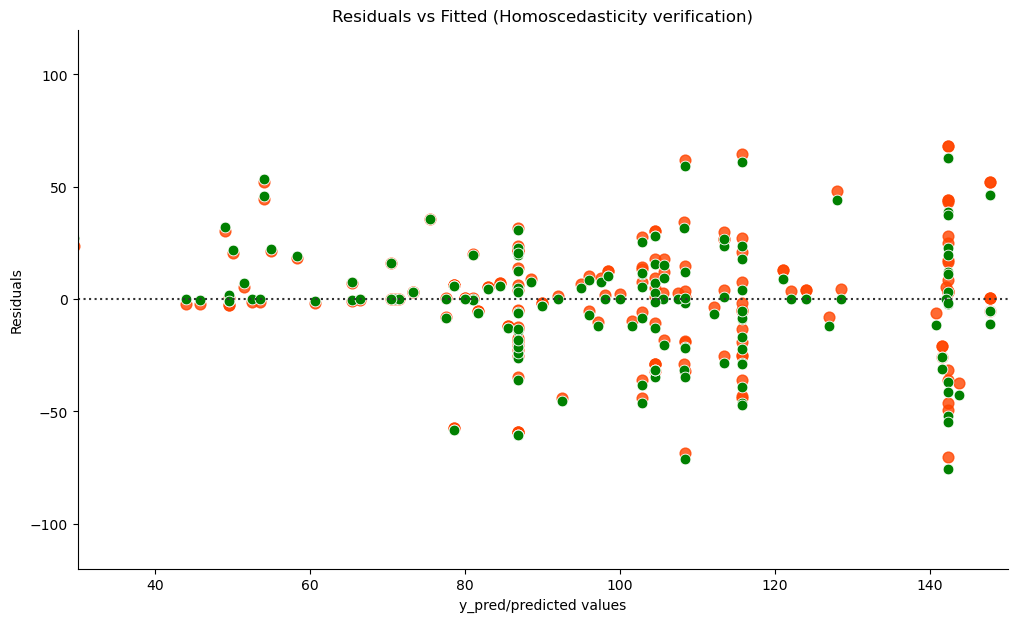

In [204]:
# HOMOSCEDASTICITY

# Pandas 'series' of the difference between y-test and predictions
residuals = y_test - y_pred


# plot of predicted values vs error or residuals
plt.rcParams["figure.figsize"] = (12,7)

ax = sns.residplot(x=y_pred, y=residuals, scatter_kws={"s": 60}, color = 'orangered')
ax.set_title('Residuals vs Fitted (Homoscedasticity verification)')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

p = sns.scatterplot(x=y_pred, y=residuals, s=60, color = 'green')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-120,120)
plt.xlim(30,150)

p = sns.lineplot(x=[0,26],y=[0,0], lw = .25, color='royalblue')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()


Mean of Residuals -2.2565971066960957




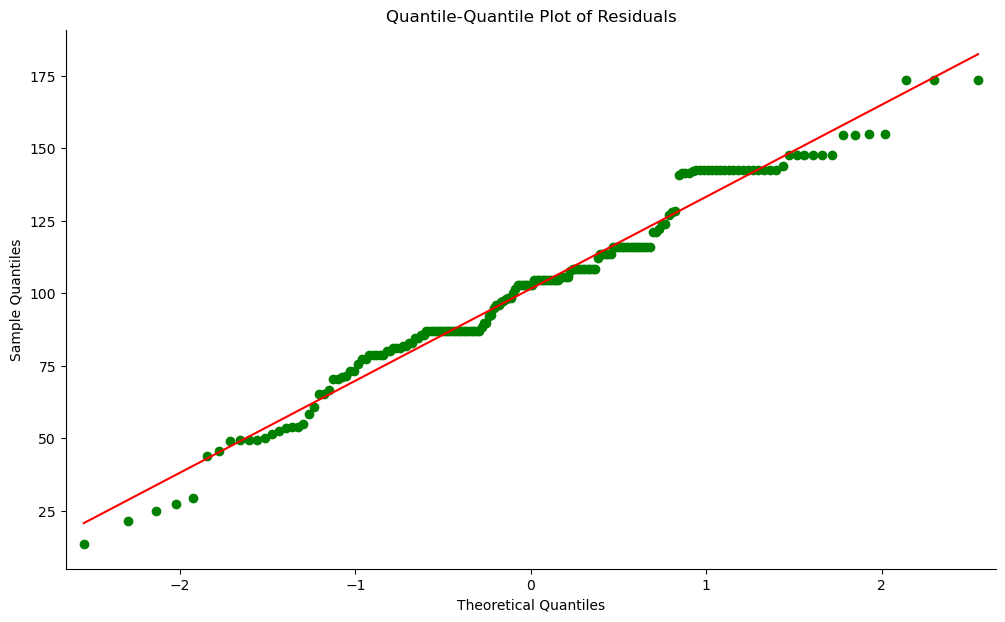

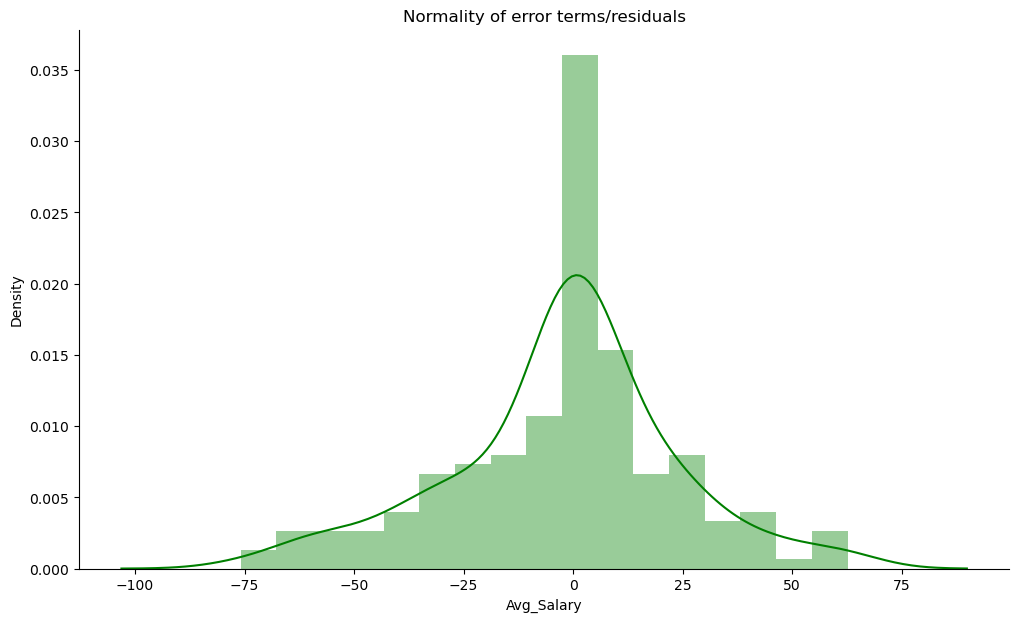

In [205]:
# NORMALITY OF RESIDUALS

# Q-Q plot. https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
# https://stackoverflow.com/questions/48009614/quantile-quantile-plot-using-python-statsmodels-api

import numpy as np
import statsmodels.api as sm
import pylab as py

# Pandas 'series' of the difference between y-test and predictions
residuals = y_test - y_pred

# The mean of the residuals should be close to 0
mean_residuals = np.mean(residuals)
print(f'\nMean of Residuals {mean_residuals}\n\n')

sm.qqplot(y_pred, line ='r', markerfacecolor='green', markeredgecolor='g', markersize = 6)
plt.title('Quantile-Quantile Plot of Residuals')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
py.show()

# Distplot()
p = sns.distplot(residuals, kde=True, color='green')
p = plt.title('Normality of error terms/residuals')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

# Logistic Classification

In [206]:
# Make copy of dataframe for Logistic Regresion Model
import copy
cpL_glassdoor = copy.deepcopy(glassdoor)

In [207]:
cpL_glassdoor.head()

job_state job_region                        Sector  Company_Age  \
0        NM  Southwest           Aerospace & Defense           47   
1        MD  Northeast                   Health Care           36   
2        FL  Southeast             Business Services           10   
3        WA       West  Oil, Gas, Energy & Utilities           55   
4        NY  Northeast             Business Services           22   

   Avg_Company_Revenue  Avg_Company_Size       Job_Title  Avg_Salary  \
0         7.500000e+07               750  Data Scientist        72.0   
1         3.000000e+09             10000  Data Scientist        87.5   
2         1.500000e+08               750  Data Scientist        85.0   
3         7.500000e+08              3000  Data Scientist        76.5   
4         1.500000e+08               125  Data Scientist       114.5   

   Min_Salary  Max_Salary  Usr_Rating  Python_y_n  R_y_n  Spark_y_n  AWS_y_n  \
0          53          91         3.8           1      0          0        0   
1          63         112         3.4           1      0          0        0   
2          80          90         4.8           1      0          1        0   
3          56          97         3.8           1      0          0        0   
4          86         143         2.9           1      0          0        0   

   Excel_y_n  
0          1  
1          0  
2          1  
3          0  
4          1

## Understanding Data

Median Salary (Python):  $107k
Median Salary (R):  $70k
Median Salary (Spark):  $108k
Median Salary (AWS):  $107k
Median Salary (Excel):  $92k

Median Annual Salary with Listed Computer Skills: $107.0k


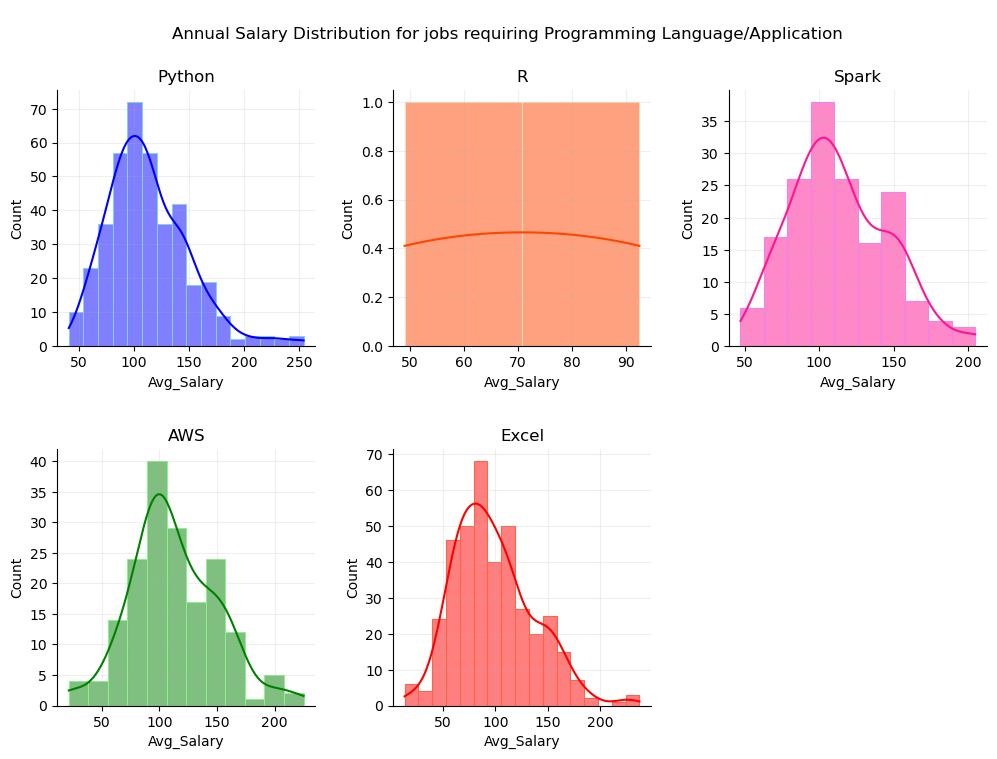

In [208]:

# Comp Skills vs. Salary

lng = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']  # Column names of Languages
ln_c = ['blue', 'orangered', 'deeppink', 'green', 'red']  #  Line and fill color
eg_c = ['skyblue', 'peachpuff', 'violet', 'lightgreen', 'tomato']  #  Edge color
header = ['Python', 'R', 'Spark', 'AWS', 'Excel']  #  Language names in Titles
median_sal_list = []

def language(lang, lin_c, edg_c, title, ax):
    gldr_lang = cpL_glassdoor[cpL_glassdoor[lang].isin([1])]
    gldr_lang_sal = int(gldr_lang.Avg_Salary.median())
    print(f'Median Salary ({title}):  ${gldr_lang_sal}k')
    median_sal_list.append(gldr_lang_sal)
    
    sns.histplot(x = 'Avg_Salary', data = gldr_lang, kde=True, lw=0.75, color=lin_c, edgecolor=edg_c, ax = ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(True, alpha = 0.2)
    ax.set_title(title)

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))
fig.suptitle('\nAnnual Salary Distribution for jobs requiring Programming Language/Application')
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

i = j = counter = 0

for l in range(len(lng)):
    language(lng[l], ln_c[l], eg_c[l], header[l], axs[i][j])
    j += 1
    counter += 1
    if counter > 4:
        plt.delaxes(axs[i][j])
        break

    if j > 2:
        i += 1; j = 0

median_data_sal = np.median(median_sal_list)        
print(f'\nMedian Annual Salary with Listed Computer Skills: ${median_data_sal}k')

# plt.savefig("..//Output_data//Fig12.png")
# # plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig12.png")


In [209]:

# Create new column Median_data_sal
median_data_sal = np.median(median_sal_list)   

cpL_glassdoor['Median_data_sal'] = np.where(cpL_glassdoor['Avg_Salary'] >= median_data_sal, 1, 0)

# Print the resulting DataFrame
cpL_glassdoor.head()

job_state job_region                        Sector  Company_Age  \
0        NM  Southwest           Aerospace & Defense           47   
1        MD  Northeast                   Health Care           36   
2        FL  Southeast             Business Services           10   
3        WA       West  Oil, Gas, Energy & Utilities           55   
4        NY  Northeast             Business Services           22   

   Avg_Company_Revenue  Avg_Company_Size       Job_Title  Avg_Salary  \
0         7.500000e+07               750  Data Scientist        72.0   
1         3.000000e+09             10000  Data Scientist        87.5   
2         1.500000e+08               750  Data Scientist        85.0   
3         7.500000e+08              3000  Data Scientist        76.5   
4         1.500000e+08               125  Data Scientist       114.5   

   Min_Salary  Max_Salary  Usr_Rating  Python_y_n  R_y_n  Spark_y_n  AWS_y_n  \
0          53          91         3.8           1      0          0        0   
1          63         112         3.4           1      0          0        0   
2          80          90         4.8           1      0          1        0   
3          56          97         3.8           1      0          0        0   
4          86         143         2.9           1      0          0        0   

   Excel_y_n  Median_data_sal  
0          1                0  
1          0                0  
2          1                0  
3          0                0  
4          1                1

In [210]:
# Dropping features of high Multicollinearity
cpL_glassdoor.drop(['job_state', 'Avg_Salary', 'Min_Salary', 'Max_Salary'], axis=1, inplace=True)
cpL_glassdoor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_region           742 non-null    object 
 1   Sector               742 non-null    object 
 2   Company_Age          742 non-null    int64  
 3   Avg_Company_Revenue  742 non-null    float64
 4   Avg_Company_Size     742 non-null    int64  
 5   Job_Title            742 non-null    object 
 6   Usr_Rating           742 non-null    float64
 7   Python_y_n           742 non-null    int64  
 8   R_y_n                742 non-null    int64  
 9   Spark_y_n            742 non-null    int64  
 10  AWS_y_n              742 non-null    int64  
 11  Excel_y_n            742 non-null    int64  
 12  Median_data_sal      742 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage: 72.6+ KB


In [211]:
# Look at Sector value counts > 10

sector = cpL_glassdoor['Sector'].value_counts()
sector[sector > 10]

cutoff_value = 10
print(sector.iloc[12:].index, '\n\n')

# Create a list
sectors_to_replace = sector[sector < cutoff_value].index.tolist()

# relabel values in 'Sector'
cpL_glassdoor['Sector'] = cpL_glassdoor['Sector']\
                                      .apply(lambda x: 'Others' if x in sectors_to_replace else x)

# Check to make sure binning was successful
cpL_glassdoor['Sector'].value_counts()

Index(['Non-Profit', 'Real Estate', 'Transportation & Logistics',
       'Travel & Tourism', 'Telecommunications', 'Media',
       'Arts, Entertainment & Recreation', 'Consumer Services',
       'Mining & Metals', 'Construction, Repair & Maintenance',
       'Agriculture & Forestry', 'Accounting & Legal'],
      dtype='object') 




Information Technology          182
Biotech & Pharmaceuticals       119
Business Services                97
Insurance                        69
Others                           61
Health Care                      50
Finance                          42
Manufacturing                    34
Aerospace & Defense              25
Education                        23
Retail                           15
Oil, Gas, Energy & Utilities     14
Government                       11
Name: Sector, dtype: int64

In [212]:
# Look at Job_Title value counts > 15

title = cpL_glassdoor['Job_Title'].value_counts()
title[title > 15]

cutoff_value = 15
print(title.iloc[5:].index, '\n\n')

# Create a list
titles_to_replace = title[title < cutoff_value].index.tolist()

# relabel values in 'Job_Title'
cpL_glassdoor['Job_Title'] = cpL_glassdoor['Job_Title']\
                                      .apply(lambda x: 'Others' if x in titles_to_replace else x)

# Check to make sure binning was successful
cpL_glassdoor['Job_Title'].value_counts()

Index(['Manager', 'Director'], dtype='object') 




Data Scientist               329
Research Scientist           157
Data Engineer                127
Data Analyst                  95
Machine Learning Engineer     20
Others                        14
Name: Job_Title, dtype: int64

In [213]:
# Get Dummy values for categorical data 
cpL_glassdoor = pd.get_dummies(cpL_glassdoor)

print(cpL_glassdoor.shape)
cpL_glassdoor.head()

(742, 34)


Company_Age  Avg_Company_Revenue  Avg_Company_Size  Usr_Rating  Python_y_n  \
0           47         7.500000e+07               750         3.8           1   
1           36         3.000000e+09             10000         3.4           1   
2           10         1.500000e+08               750         4.8           1   
3           55         7.500000e+08              3000         3.8           1   
4           22         1.500000e+08               125         2.9           1   

   R_y_n  Spark_y_n  AWS_y_n  Excel_y_n  Median_data_sal  job_region_Midwest  \
0      0          0        0          1                0                   0   
1      0          0        0          0                0                   0   
2      0          1        0          1                0                   0   
3      0          0        0          0                0                   0   
4      0          0        0          1                1                   0   

   job_region_Northeast  job_region_Southeast  job_region_Southwest  \
0                     0                     0                     1   
1                     1                     0                     0   
2                     0                     1                     0   
3                     0                     0                     0   
4                     1                     0                     0   

   job_region_West  Sector_Aerospace & Defense  \
0                0                           1   
1                0                           0   
2                0                           0   
3                1                           0   
4                0                           0   

   Sector_Biotech & Pharmaceuticals  Sector_Business Services  \
0                                 0                         0   
1                                 0                         0   
2                                 0                         1   
3                                 0                         0   
4                                 0                         1   

   Sector_Education  Sector_Finance  Sector_Government  Sector_Health Care  \
0                 0               0                  0                   0   
1                 0               0                  0                   1   
2                 0               0                  0                   0   
3                 0               0                  0                   0   
4                 0               0                  0                   0   

   Sector_Information Technology  Sector_Insurance  Sector_Manufacturing  \
0                              0                 0                     0   
1                              0                 0                     0   
2                              0                 0                     0   
3                              0                 0                     0   
4                              0                 0                     0   

   Sector_Oil, Gas, Energy & Utilities  Sector_Others  Sector_Retail  \
0                                    0              0              0   
1                                    0              0              0   
2                                    0              0              0   
3                                    1              0              0   
4                                    0              0              0   

   Job_Title_Data Analyst  Job_Title_Data Engineer  Job_Title_Data Scientist  \
0                       0                        0                         1   
1                       0                        0                         1   
2                       0                        0                         1   
3                       0                        0                         1   
4                       0                        0                         1   

   Job_Title_Machine Learning Engineer  Job_Title_Others  \
0               

In [214]:
cpL_glassdoor.rename({
             'Sector_Aerospace & Defense': 'Sector_Aerospace_Defense',
             'Sector_Biotech & Pharmaceuticals': 'Sector_Biotech_Pharmaceuticals',
             'Sector_Business Services': 'Sector_Business_Services',
             'Sector_Health Care': 'Sector_Health_Care',
             'Sector_Information Technology': 'Sector_Information_Technology',
             'Sector_Oil, Gas, Energy & Utilities': 'Sector_Oil_Gas_Energy_Utilities',
             'Job_Title_Data Analyst': 'Job_Title_Data_Analyst',
             'Job_Title_Data Engineer': 'Job_Title_Data_Engineer',
             'Job_Title_Data Scientist': 'Job_Title_Data_Scientist',
             'Job_Title_Machine Learning Engineer': 'Job_Title_Machine_Learning_Engineer',
             'Job_Title_Research Scientist': 'Job_Title_Research_Scientist'}
             , axis = 1, inplace = True)

In [215]:
# Dropping significant columns
cpL_glassdoor.drop(['job_region_West', 'Sector_Information_Technology', 'Job_Title_Data_Scientist'], axis=1, inplace=True)
cpL_glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company_Age                          742 non-null    int64  
 1   Avg_Company_Revenue                  742 non-null    float64
 2   Avg_Company_Size                     742 non-null    int64  
 3   Usr_Rating                           742 non-null    float64
 4   Python_y_n                           742 non-null    int64  
 5   R_y_n                                742 non-null    int64  
 6   Spark_y_n                            742 non-null    int64  
 7   AWS_y_n                              742 non-null    int64  
 8   Excel_y_n                            742 non-null    int64  
 9   Median_data_sal                      742 non-null    int32  
 10  job_region_Midwest                   742 non-null    uint8  
 11  job_region_Northeast            

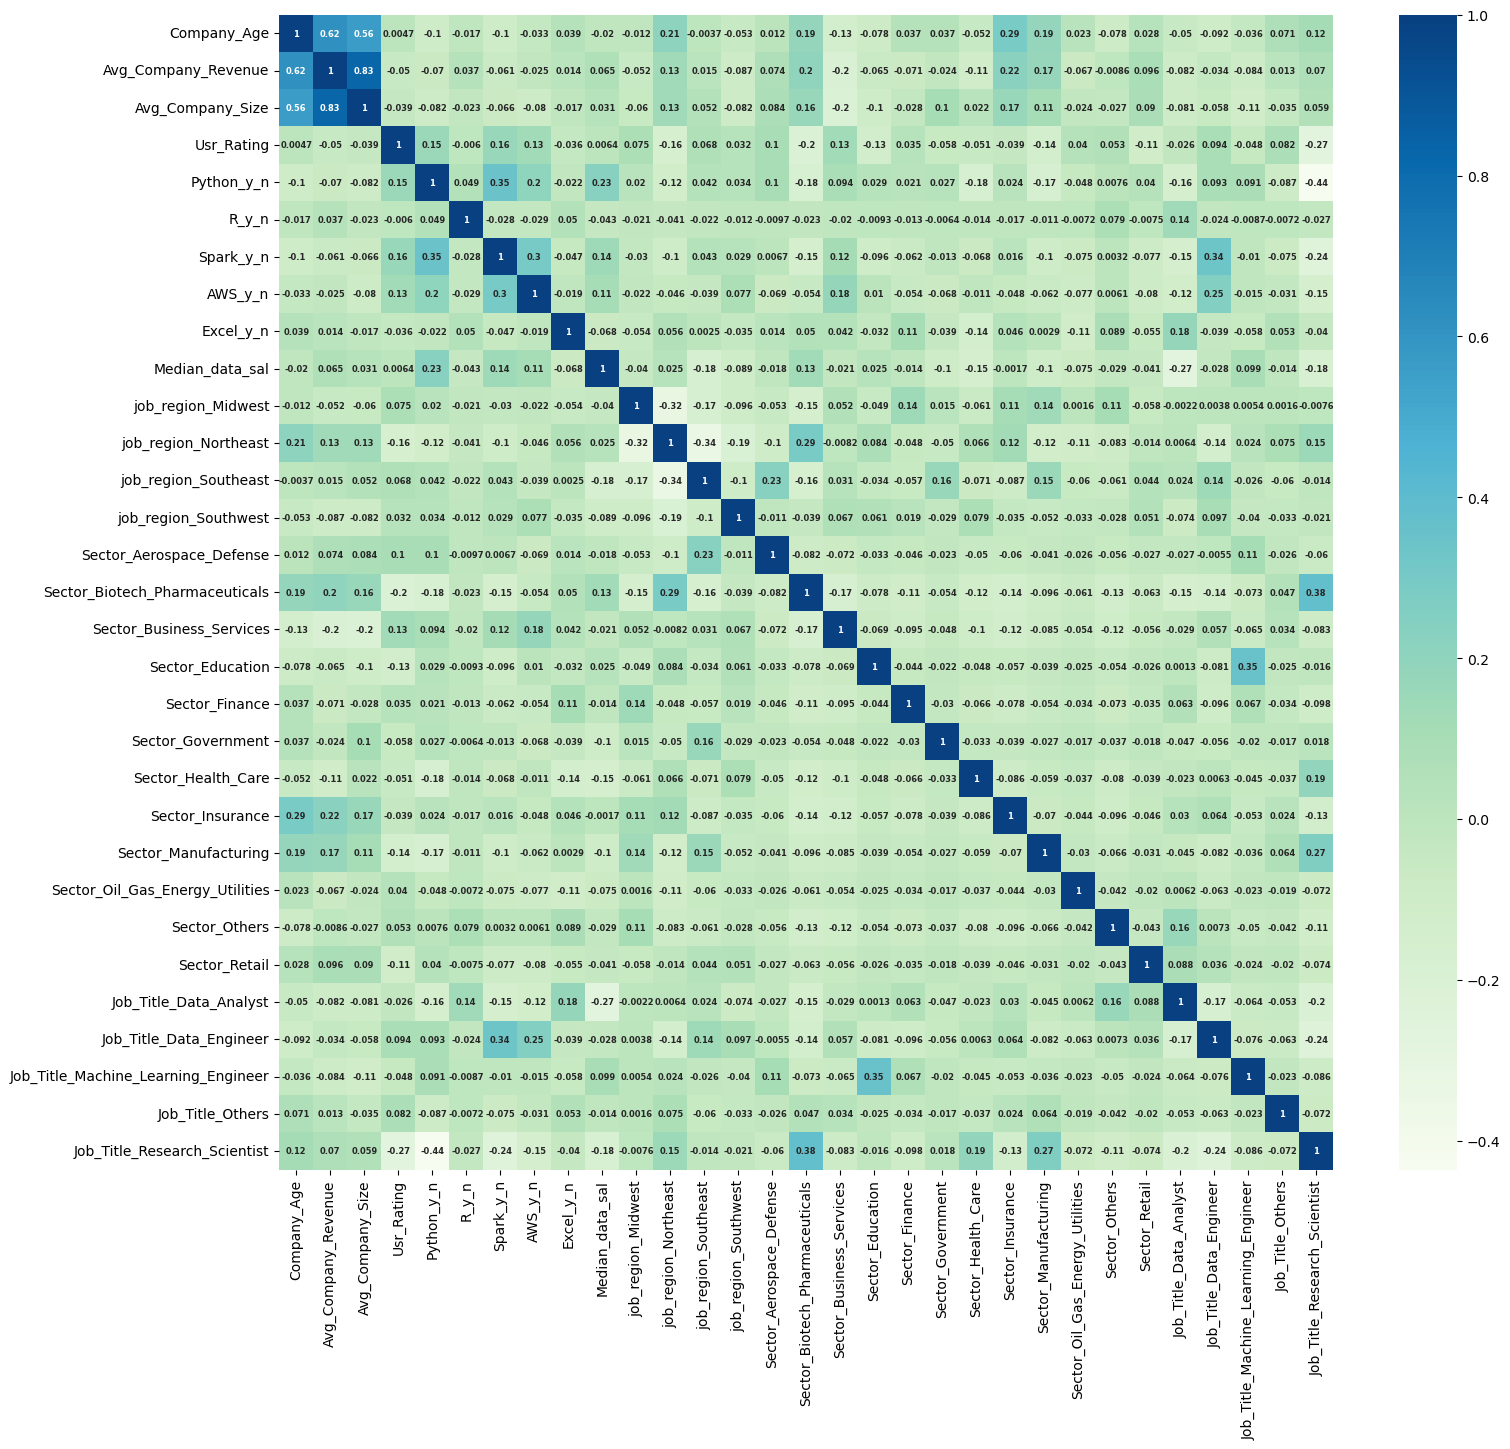

In [216]:
# Check for MultiCollinearity

# Correlation Matrix
cor_matrix = cpL_glassdoor.corr()

# Create heatmap
plt.rcParams["figure.figsize"] = (17,15)
sns.heatmap(cor_matrix, cmap = 'GnBu', annot=True, annot_kws={"fontsize": 6, "fontweight": "bold"})
plt.show()

In [217]:
# Drop features with high correlation value
cpL_glassdoor.drop(['Avg_Company_Size'], axis=1, inplace=True)
cpL_glassdoor.columns

Index(['Company_Age', 'Avg_Company_Revenue', 'Usr_Rating', 'Python_y_n',
       'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n', 'Median_data_sal',
       'job_region_Midwest', 'job_region_Northeast', 'job_region_Southeast',
       'job_region_Southwest', 'Sector_Aerospace_Defense',
       'Sector_Biotech_Pharmaceuticals', 'Sector_Business_Services',
       'Sector_Education', 'Sector_Finance', 'Sector_Government',
       'Sector_Health_Care', 'Sector_Insurance', 'Sector_Manufacturing',
       'Sector_Oil_Gas_Energy_Utilities', 'Sector_Others', 'Sector_Retail',
       'Job_Title_Data_Analyst', 'Job_Title_Data_Engineer',
       'Job_Title_Machine_Learning_Engineer', 'Job_Title_Others',
       'Job_Title_Research_Scientist'],
      dtype='object')

### Using Decision Tree Model for Logistic Regression

In [218]:
# Split preprocessed data into features (predictors) and target arrays

y = cpL_glassdoor.Median_data_sal.values
X = cpL_glassdoor.drop(columns = "Median_data_sal").values
X_columns =cpL_glassdoor.drop(columns = "Median_data_sal").columns.tolist()
print(f'y : {y}')
print(f'X (Column Names) : {X_columns}')

y : [0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 

In [219]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

# Check the shape of X_
print(X_train.shape, X_test.shape)


(556, 29) (186, 29)


### Fitting Training Data to Decision Tree Model

In [220]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [221]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth = 8)

# Fitting the model
model = model.fit(X_train, y_train)

# Making predictions using the training data
predictions = model.predict(X_train)

### Model Evaluation with Training Data

In [222]:
# Calculating the confusion matrix
cm = confusion_matrix(y_train, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_train, predictions)

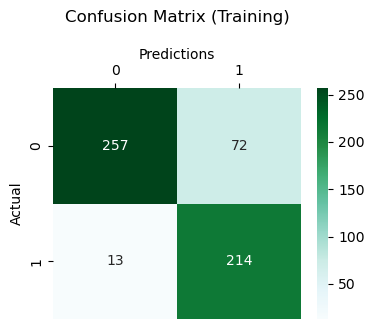

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.8471223021582733

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       329
           1       0.75      0.94      0.83       227

    accuracy                           0.85       556
   macro avg       0.85      0.86      0.85       556
weighted avg       0.87      0.85      0.85       556



In [223]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='BuGn')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Training)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_train, predictions))


Text(0.5, 1.0, 'ROC Curve Using Training Data')

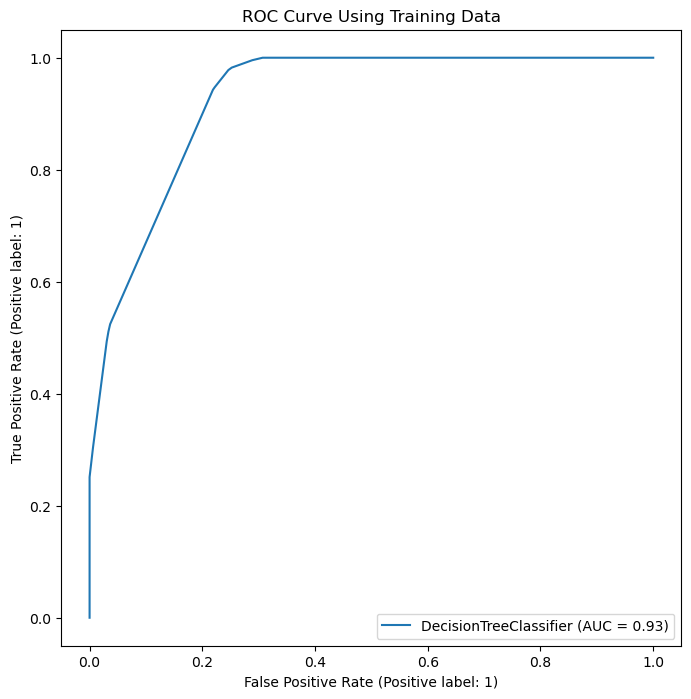

In [224]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)
# RocCurveDisplay.from_estimator(model, feature_train, target_train)
RocCurveDisplay.from_estimator(model, X_train, y_train)
plt.title('ROC Curve Using Training Data')

# The model type is automatically detected and noted in the legend

In [225]:
# import roc auc score
# Score = .9 to 1 = excellent, .8 to .9 = good, .7 to .8 = fair
from sklearn.metrics import roc_auc_score

# Get predictions probability
predictions_prob = model.predict_proba(X_train)[::,1]

# Compute the area under ROC curve
auc = roc_auc_score(y_train, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.9277613379216154


### Fitting Testing Data to Decision Tree Model

In [226]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth = 8)

# Fitting the model
model = model.fit(X_test, y_test)

# Making predictions using the training data
predictions = model.predict(X_test)

In [227]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

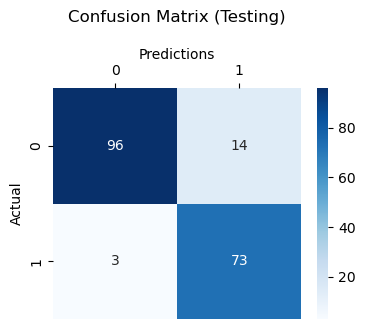

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.9086021505376344

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       110
           1       0.84      0.96      0.90        76

    accuracy                           0.91       186
   macro avg       0.90      0.92      0.91       186
weighted avg       0.92      0.91      0.91       186



In [228]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='Blues')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Testing)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_test, predictions))


Text(0.5, 1.0, 'ROC Curve Using Testing Data')

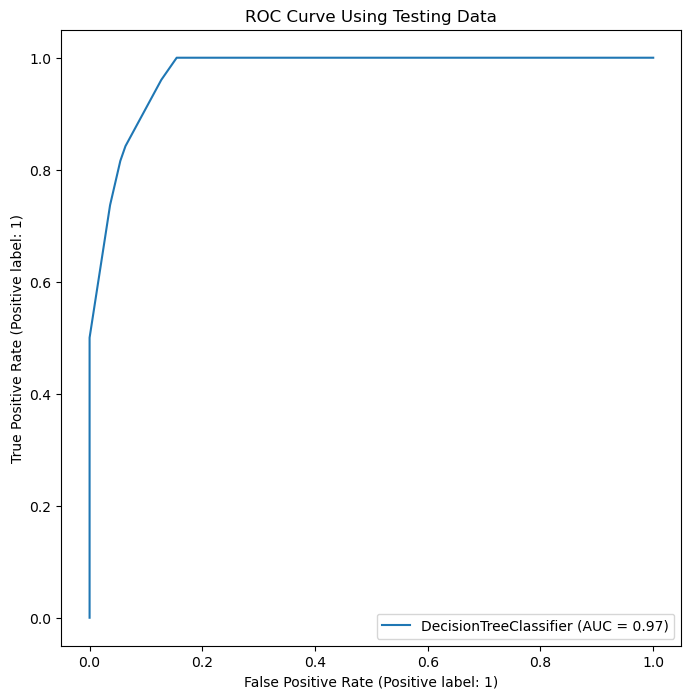

In [229]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)

# RocCurveDisplay.from_estimator(model, feature_test, target_test)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve Using Testing Data')

# The model type is automatically detected and noted in the legend

In [230]:
# import roc auc score
# Score = .9 to 1 = excellent, .8 to .9 = good, .7 to .8 = fair
from sklearn.metrics import roc_auc_score

# Get predictions probability
predictions_prob = model.predict_proba(X_test)[::,1]

# Compute the area under ROC curve
auc = roc_auc_score(y_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.9736842105263158


### Decision Tree Visualization

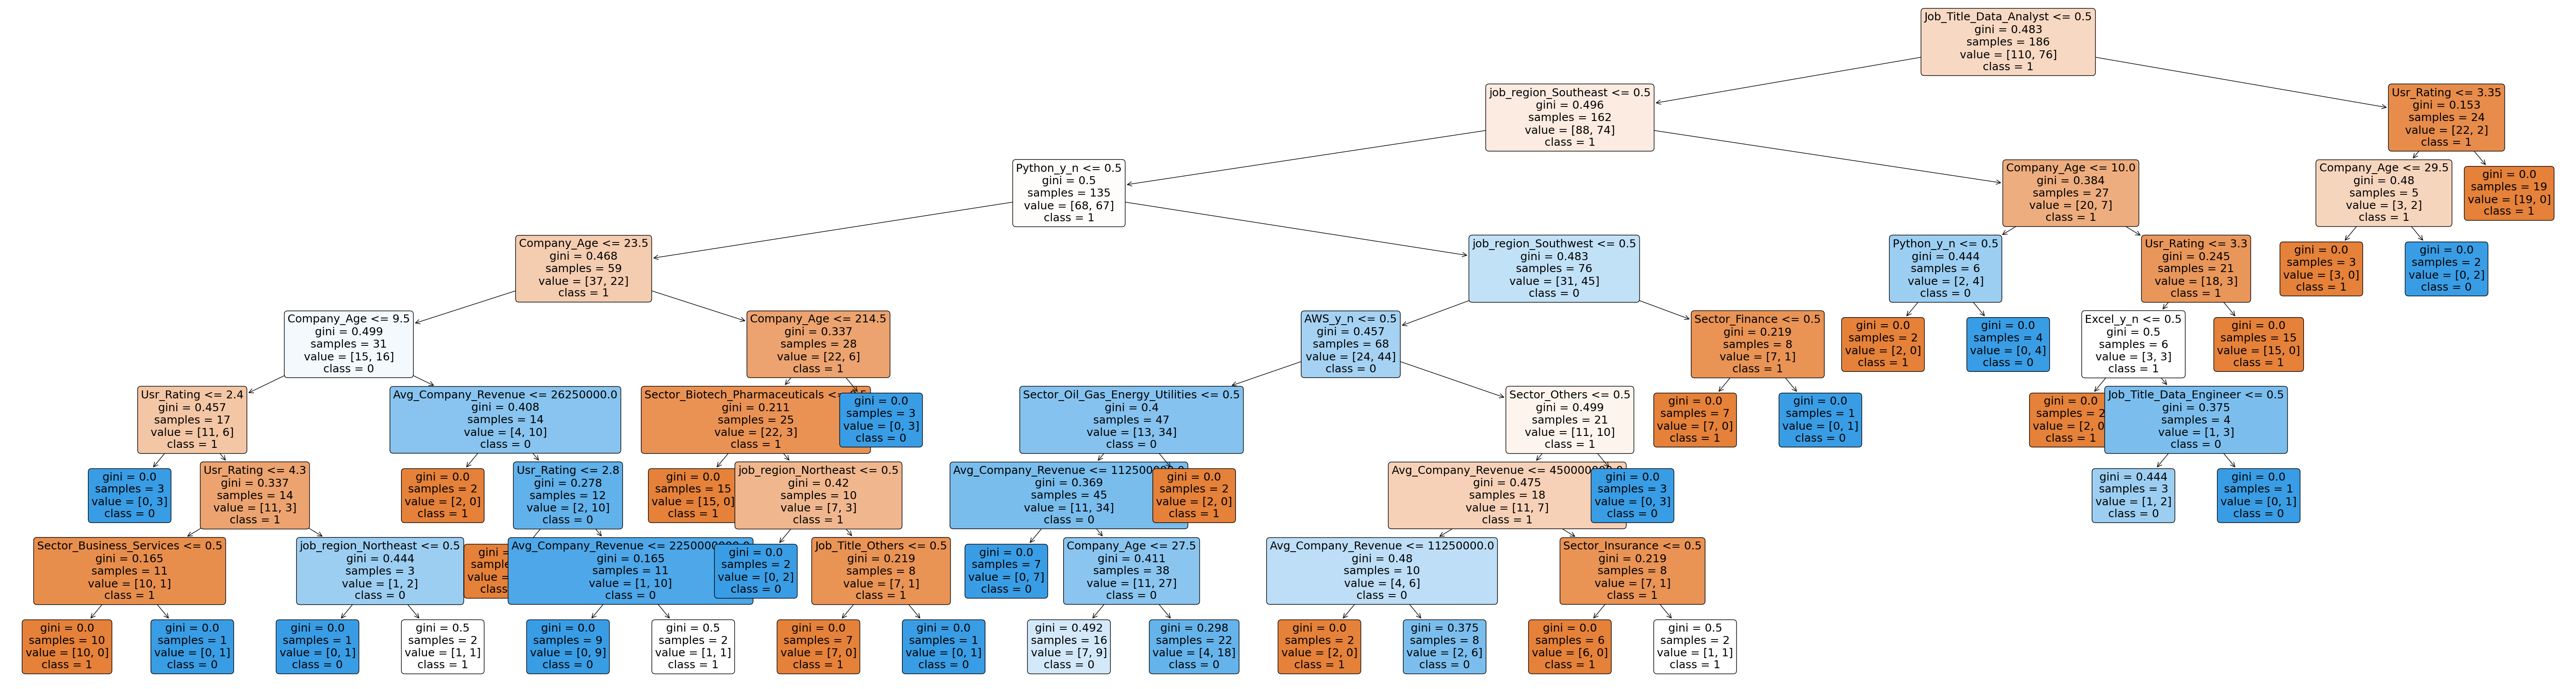

In [231]:
# Decision trees need a plot to visualize the tree 
# Interpreting: If the condition is True, branch to the left if False, branch to the right

from sklearn import tree  
import matplotlib.pyplot as plt

plt.figure(figsize=(75,20)) 
features = list(X_columns)

Data_Jobs_tree = tree.plot_tree(model, feature_names=features, class_names=['1', '0'], filled=True, rounded = True, fontsize=18)

In [232]:
text_representation = tree.export_text(model, feature_names=features)
print('\n\n', text_representation)



 |--- Job_Title_Data_Analyst <= 0.50
|   |--- job_region_Southeast <= 0.50
|   |   |--- Python_y_n <= 0.50
|   |   |   |--- Company_Age <= 23.50
|   |   |   |   |--- Company_Age <= 9.50
|   |   |   |   |   |--- Usr_Rating <= 2.40
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Usr_Rating >  2.40
|   |   |   |   |   |   |--- Usr_Rating <= 4.30
|   |   |   |   |   |   |   |--- Sector_Business_Services <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Sector_Business_Services >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Usr_Rating >  4.30
|   |   |   |   |   |   |   |--- job_region_Northeast <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- job_region_Northeast >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Company_Age >  9.50
|   |   |   |   |   |--- Avg_Company_Revenue <= 26250000.00
|   |   |   |   |   |   |--- class: 0
|   |   |  

In [233]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
sorted(zip(model.feature_importances_, X_columns), reverse=True)

[(0.22023025029557755, 'Company_Age'),
 (0.1399772540663168, 'Usr_Rating'),
 (0.11733911509213618, 'Avg_Company_Revenue'),
 (0.08598957094045251, 'Python_y_n'),
 (0.08557172335691718, 'Job_Title_Data_Analyst'),
 (0.057261198578518614, 'job_region_Southwest'),
 (0.040848063380597405, 'job_region_Northeast'),
 (0.03710660182012138, 'job_region_Southeast'),
 (0.032085861480763214, 'Sector_Oil_Gas_Energy_Utilities'),
 (0.028187143821227754, 'Sector_Others'),
 (0.026683547118517635, 'Sector_Business_Services'),
 (0.02603693347894495, 'AWS_y_n'),
 (0.025682914101573223, 'Sector_Finance'),
 (0.025682914101573223, 'Job_Title_Others'),
 (0.022013926372777045, 'Excel_y_n'),
 (0.015850026988399487, 'Sector_Biotech_Pharmaceuticals'),
 (0.011006963186388522, 'Sector_Insurance'),
 (0.002445991819197451, 'Job_Title_Data_Engineer'),
 (0.0, 'job_region_Midwest'),
 (0.0, 'Spark_y_n'),
 (0.0, 'Sector_Retail'),
 (0.0, 'Sector_Manufacturing'),
 (0.0, 'Sector_Health_Care'),
 (0.0, 'Sector_Government'),
 (0.

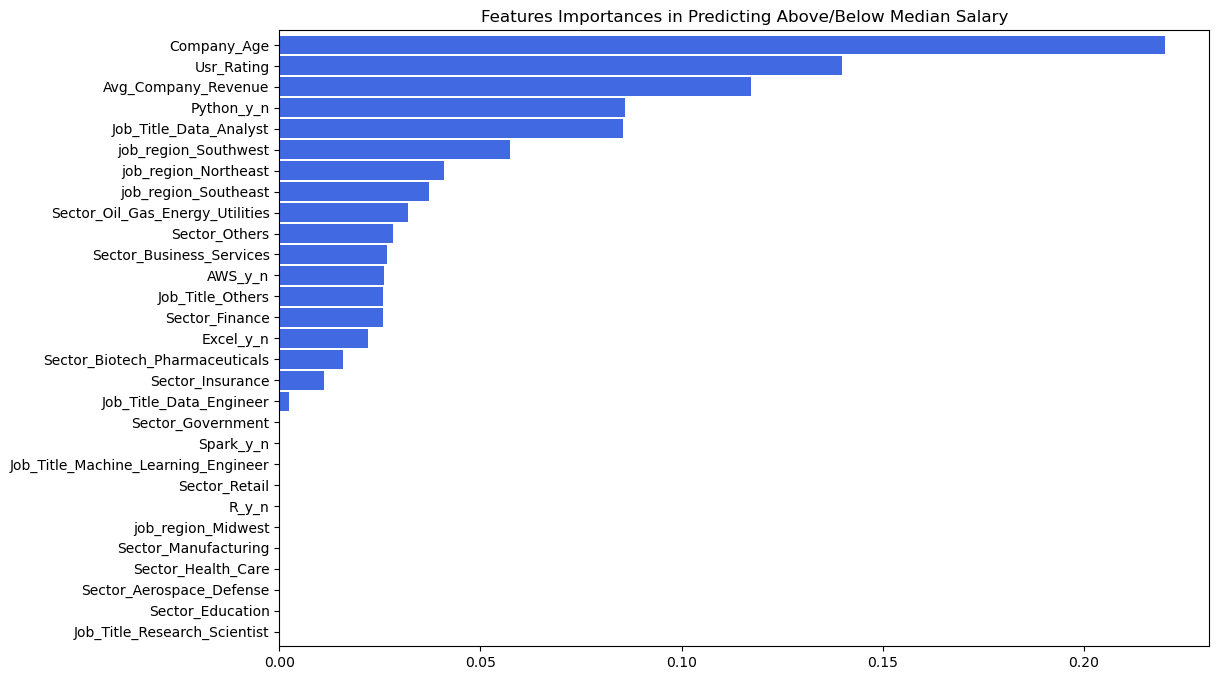

In [234]:
# Visualize the features by importance

fi = pd.DataFrame(data = model.feature_importances_, index = X_columns, columns=['importance'])
fi.sort_values('importance').plot(kind = 'barh', color='royalblue', title= 'Features Importances in Predicting Above/Below Median Salary', legend=False, width=0.9, figsize=(12, 8))
plt.show()

## Using Random Forest Model

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=78)

### Making Predictions Using Training Data

In [250]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [251]:
predictions = rf_model.predict(X_train)

### Model Evaluation

In [252]:
# Calculating the confusion matrix
cm = confusion_matrix(y_train, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_train, predictions)

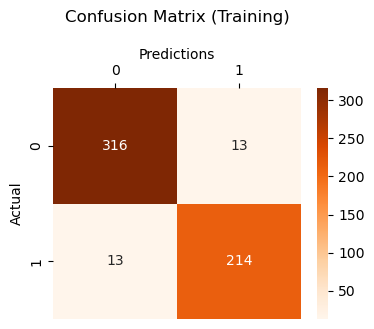

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.9532374100719424

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       329
           1       0.94      0.94      0.94       227

    accuracy                           0.95       556
   macro avg       0.95      0.95      0.95       556
weighted avg       0.95      0.95      0.95       556



In [253]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='Oranges')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Training)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_train, predictions))


Text(0.5, 1.0, 'ROC Curve Using Training Data')

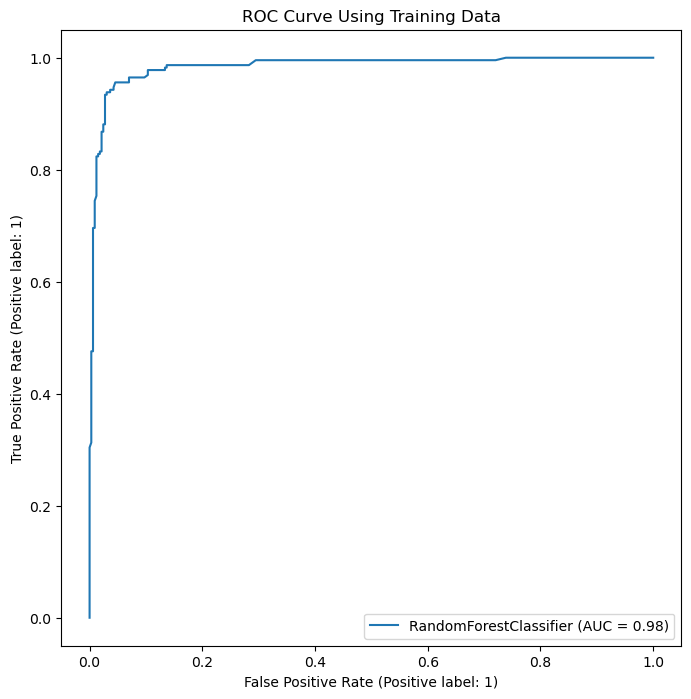

In [254]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)
# RocCurveDisplay.from_estimator(model, feature_train, target_train)
RocCurveDisplay.from_estimator(rf_model, X_train, y_train)
plt.title('ROC Curve Using Training Data')

# The model type is automatically detected and noted in the legend

In [255]:
from sklearn.metrics import roc_auc_score
# Score = .9 to 1 = excellent, .8 to .9 = good, .7 to .8 = fair

# Get predictions probability
predictions_prob = rf_model.predict_proba(X_train)[::,1]

# Compute the area under ROC curve
auc = roc_auc_score(y_train, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.9843070042713871


### Making Predictions Using Testing Data

In [256]:
predictions = rf_model.predict(X_test)

### Model Evaluation

In [257]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

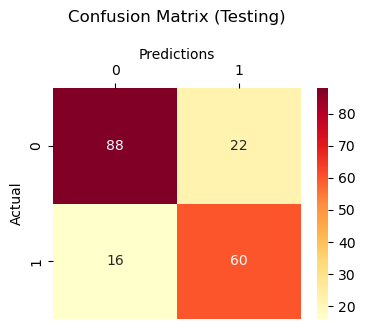

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.7956989247311828

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       110
           1       0.73      0.79      0.76        76

    accuracy                           0.80       186
   macro avg       0.79      0.79      0.79       186
weighted avg       0.80      0.80      0.80       186



In [262]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='YlOrRd')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Testing)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_test, predictions))


Text(0.5, 1.0, 'ROC Curve Using Testing Data')

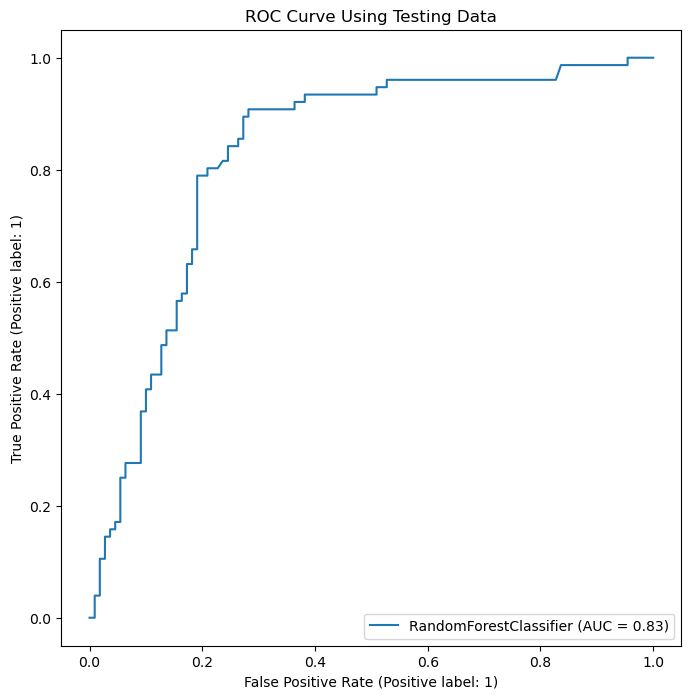

In [263]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)
# RocCurveDisplay.from_estimator(model, feature_test, target_test)
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('ROC Curve Using Testing Data')

# The model type is automatically detected and noted in the legend

In [264]:
from sklearn.metrics import roc_auc_score
# Score = .9 to 1 = excellent, .8 to .9 = good, .7 to .8 = fair

# Get predictions probability
predictions_prob = rf_model.predict_proba(X_test)[::,1]

# Compute the area under ROC curve
auc = roc_auc_score(y_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.8274521531100476


## Feature Importance

In [265]:
# Random Forests in sklearn automatically calculates feature importance
importances = rf_model.feature_importances_

# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X_columns), reverse=True)

[(0.15641211761868254, 'Company_Age'),
 (0.1202093965724589, 'Usr_Rating'),
 (0.1002263539468279, 'Job_Title_Data_Analyst'),
 (0.09069658295576345, 'Avg_Company_Revenue'),
 (0.06741065293370578, 'Job_Title_Research_Scientist'),
 (0.06555176893474103, 'Python_y_n'),
 (0.04458951891859946, 'job_region_Southeast'),
 (0.034705572286969875, 'Spark_y_n'),
 (0.031932392765876554, 'Excel_y_n'),
 (0.03114125350909878, 'Job_Title_Data_Engineer'),
 (0.031057550238906675, 'Sector_Biotech_Pharmaceuticals'),
 (0.029263271794576287, 'AWS_y_n'),
 (0.026057061929587164, 'Sector_Health_Care'),
 (0.023000559844332764, 'job_region_Northeast'),
 (0.02074673268648476, 'Sector_Business_Services'),
 (0.01623374694047407, 'job_region_Southwest'),
 (0.013342161909041372, 'Sector_Insurance'),
 (0.013283163522006178, 'job_region_Midwest'),
 (0.012625947756259347, 'Job_Title_Machine_Learning_Engineer'),
 (0.011301812973286416, 'Sector_Others'),
 (0.01077473600365692, 'Sector_Manufacturing'),
 (0.009330012642344693

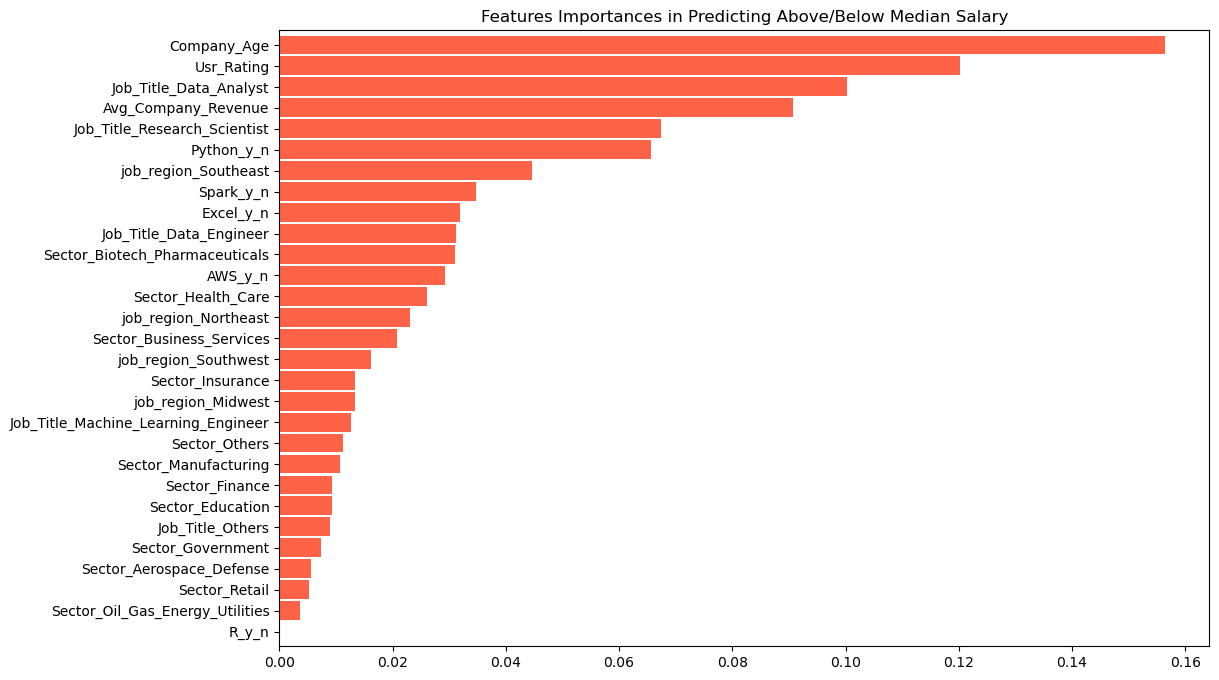

In [266]:
# Visualize the features by importance

fi = pd.DataFrame(data = rf_model.feature_importances_, index = X_columns, columns=['importance'])
fi.sort_values('importance').plot(kind = 'barh', color='tomato', title= 'Features Importances in Predicting Above/Below Median Salary', legend=False, width=0.9, figsize=(12, 8))
plt.show()


## 'LBFGS' Optimization Algorithm For Logistic Regression

In [267]:
# Split preprocessed data into features (predictors) and target arrays

y = cpL_glassdoor.Median_data_sal.values
X = cpL_glassdoor.drop(columns = "Median_data_sal").values
X_columns =cpL_glassdoor.drop(columns = "Median_data_sal").columns.tolist()
print(f'y : {y[:5]}\n')
print(f'X (Column Names) : ')
X_columns

y : [0 0 0 0 1]

X (Column Names) : 


['Company_Age',
 'Avg_Company_Revenue',
 'Usr_Rating',
 'Python_y_n',
 'R_y_n',
 'Spark_y_n',
 'AWS_y_n',
 'Excel_y_n',
 'job_region_Midwest',
 'job_region_Northeast',
 'job_region_Southeast',
 'job_region_Southwest',
 'Sector_Aerospace_Defense',
 'Sector_Biotech_Pharmaceuticals',
 'Sector_Business_Services',
 'Sector_Education',
 'Sector_Finance',
 'Sector_Government',
 'Sector_Health_Care',
 'Sector_Insurance',
 'Sector_Manufacturing',
 'Sector_Oil_Gas_Energy_Utilities',
 'Sector_Others',
 'Sector_Retail',
 'Job_Title_Data_Analyst',
 'Job_Title_Data_Engineer',
 'Job_Title_Machine_Learning_Engineer',
 'Job_Title_Others',
 'Job_Title_Research_Scientist']

In [268]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

scaler = StandardScaler()

# use input features only, no need to scale target
scaled_X = scaler.fit_transform(X)

print(type(scaled_X))  # changed data type from Pandas df to 2-d Numpy array

print(f'Shape of resulting Numpy array: {scaled_X.shape}\n')
print("Standardized Features:\n", scaled_X[:1])   # View first row


<class 'numpy.ndarray'>
Shape of resulting Numpy array: (742, 29)

Standardized Features:
 [[ 0.0063515  -0.62144207  0.23090884  0.94491118 -0.05198752 -0.53892002
  -0.55763255  0.9551812  -0.40148395 -0.7852119  -0.43046895  4.18927201
   5.35537114 -0.43704832 -0.3877984  -0.17885434 -0.24494897 -0.1226698
  -0.26880167 -0.32019682 -0.21914059 -0.13867505 -0.29928942 -0.143641
  -0.38318603 -0.45442718 -0.16643567 -0.13867505 -0.51805026]]


In [269]:

# Create new DataFrame with scaled features
scaled_df = pd.DataFrame(data = scaled_X, columns = X_columns[:29])
print(f'\nNew scaled_df: ')
display(scaled_df.head())

# extract 'Median_data_sal' column from cpL_glassdoor
extracted_col = cpL_glassdoor['Median_data_sal']
# view first 20 records.
print(f'\nExtracted target column data type: {type(extracted_col)}')
print(extracted_col.head())



New scaled_df: 


Company_Age  Avg_Company_Revenue  Usr_Rating  Python_y_n     R_y_n  \
0     0.006351            -0.621442    0.230909    0.944911 -0.051988   
1    -0.198553            -0.099288   -0.324470    0.944911 -0.051988   
2    -0.682874            -0.608053    1.619356    0.944911 -0.051988   
3     0.155373            -0.500945    0.230909    0.944911 -0.051988   
4    -0.459341            -0.608053   -1.018693    0.944911 -0.051988   

   Spark_y_n   AWS_y_n  Excel_y_n  job_region_Midwest  job_region_Northeast  \
0  -0.538920 -0.557633   0.955181           -0.401484             -0.785212   
1  -0.538920 -0.557633  -1.046922           -0.401484              1.273542   
2   1.855563 -0.557633   0.955181           -0.401484             -0.785212   
3  -0.538920 -0.557633  -1.046922           -0.401484             -0.785212   
4  -0.538920 -0.557633   0.955181           -0.401484              1.273542   

   job_region_Southeast  job_region_Southwest  Sector_Aerospace_Defense  \
0             -0.430469              4.189272                  5.355371   
1             -0.430469             -0.238705                 -0.186728   
2              2.323048             -0.238705                 -0.186728   
3             -0.430469             -0.238705                 -0.186728   
4             -0.430469             -0.238705                 -0.186728   

   Sector_Biotech_Pharmaceuticals  Sector_Business_Services  Sector_Education  \
0                       -0.437048                 -0.387798         -0.178854   
1                       -0.437048                 -0.387798         -0.178854   
2                       -0.437048                  2.578659         -0.178854   
3                       -0.437048                 -0.387798         -0.178854   
4                       -0.437048                  2.578659         -0.178854   

   Sector_Finance  Sector_Government  Sector_Health_Care  Sector_Insurance  \
0       -0.244949           -0.12267           -0.268802         -0.320197   
1       -0.244949           -0.12267            3.720215         -0.320197   
2       -0.244949           -0.12267           -0.268802         -0.320197   
3       -0.244949           -0.12267           -0.268802         -0.320197   
4       -0.244949           -0.12267           -0.268802         -0.320197   

   Sector_Manufacturing  Sector_Oil_Gas_Energy_Utilities  Sector_Others  \
0             -0.219141                        -0.138675      -0.299289   
1             -0.219141                        -0.138675      -0.299289   
2             -0.219141                        -0.138675      -0.299289   
3             -0.219141                         7.211103      -0.299289   
4             -0.219141                        -0.138675      -0.299289   

   Sector_Retail  Job_Title_Data_Analyst  Job_Title_Data_Engineer  \
0      -0.143641               -0.383186                -0.454427   
1      -0.143641               -0.383186                -0.454427   
2      -0.143641               -0.383186                -0.454427   
3      -0.143641               -0.383186                -0.454427   
4      -0.143641               -0.383186                -0.454427   

   Job_Title_Machine_Learning_Engineer  Job_Title_Others  \
0                            -0.166436         -0.138675   
1                            -0.166436         -0.138675   
2                            -0.166436         -0.138675   
3                            -0.166436         -0.138675   
4                            -0.166436         -0.138675   

   Job_Title_Research_Scientist  
0                      -0.51805  
1                      -0.51805  
2                      -0.51805  
3                      -0.51805  
4                      -0.51805


Extracted target column data type: <class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    1
Name: Median_data_sal, dtype: int32


In [270]:
# join the 'Median_data_sal' column to the scaled_df

scaled_df = scaled_df.join(extracted_col)
scaled_df.head()

Company_Age  Avg_Company_Revenue  Usr_Rating  Python_y_n     R_y_n  \
0     0.006351            -0.621442    0.230909    0.944911 -0.051988   
1    -0.198553            -0.099288   -0.324470    0.944911 -0.051988   
2    -0.682874            -0.608053    1.619356    0.944911 -0.051988   
3     0.155373            -0.500945    0.230909    0.944911 -0.051988   
4    -0.459341            -0.608053   -1.018693    0.944911 -0.051988   

   Spark_y_n   AWS_y_n  Excel_y_n  job_region_Midwest  job_region_Northeast  \
0  -0.538920 -0.557633   0.955181           -0.401484             -0.785212   
1  -0.538920 -0.557633  -1.046922           -0.401484              1.273542   
2   1.855563 -0.557633   0.955181           -0.401484             -0.785212   
3  -0.538920 -0.557633  -1.046922           -0.401484             -0.785212   
4  -0.538920 -0.557633   0.955181           -0.401484              1.273542   

   job_region_Southeast  job_region_Southwest  Sector_Aerospace_Defense  \
0             -0.430469              4.189272                  5.355371   
1             -0.430469             -0.238705                 -0.186728   
2              2.323048             -0.238705                 -0.186728   
3             -0.430469             -0.238705                 -0.186728   
4             -0.430469             -0.238705                 -0.186728   

   Sector_Biotech_Pharmaceuticals  Sector_Business_Services  Sector_Education  \
0                       -0.437048                 -0.387798         -0.178854   
1                       -0.437048                 -0.387798         -0.178854   
2                       -0.437048                  2.578659         -0.178854   
3                       -0.437048                 -0.387798         -0.178854   
4                       -0.437048                  2.578659         -0.178854   

   Sector_Finance  Sector_Government  Sector_Health_Care  Sector_Insurance  \
0       -0.244949           -0.12267           -0.268802         -0.320197   
1       -0.244949           -0.12267            3.720215         -0.320197   
2       -0.244949           -0.12267           -0.268802         -0.320197   
3       -0.244949           -0.12267           -0.268802         -0.320197   
4       -0.244949           -0.12267           -0.268802         -0.320197   

   Sector_Manufacturing  Sector_Oil_Gas_Energy_Utilities  Sector_Others  \
0             -0.219141                        -0.138675      -0.299289   
1             -0.219141                        -0.138675      -0.299289   
2             -0.219141                        -0.138675      -0.299289   
3             -0.219141                         7.211103      -0.299289   
4             -0.219141                        -0.138675      -0.299289   

   Sector_Retail  Job_Title_Data_Analyst  Job_Title_Data_Engineer  \
0      -0.143641               -0.383186                -0.454427   
1      -0.143641               -0.383186                -0.454427   
2      -0.143641               -0.383186                -0.454427   
3      -0.143641               -0.383186                -0.454427   
4      -0.143641               -0.383186                -0.454427   

   Job_Title_Machine_Learning_Engineer  Job_Title_Others  \
0                            -0.166436         -0.138675   
1                            -0.166436         -0.138675   
2                            -0.166436         -0.138675   
3                            -0.166436         -0.138675   
4                            -0.166436         -0.138675   

   Job_Title_Research_Scientist  Median_data_sal  
0                      -0.51805                0  
1                      -0.51805                0  
2                      -0.51805                0  
3                      -0.51805                0  
4                      -0.51805                1

In [271]:
# Separate the data into labels and features

# y variable, the labels
y = scaled_df['Median_data_sal']
print(f'\ny label: {y.name}\n\n')


# X variable, the features
X = scaled_df.copy()
X.drop('Median_data_sal', axis=1, inplace=True)
print(f'X Columns:')
list(X.columns)


y label: Median_data_sal


X Columns:


['Company_Age',
 'Avg_Company_Revenue',
 'Usr_Rating',
 'Python_y_n',
 'R_y_n',
 'Spark_y_n',
 'AWS_y_n',
 'Excel_y_n',
 'job_region_Midwest',
 'job_region_Northeast',
 'job_region_Southeast',
 'job_region_Southwest',
 'Sector_Aerospace_Defense',
 'Sector_Biotech_Pharmaceuticals',
 'Sector_Business_Services',
 'Sector_Education',
 'Sector_Finance',
 'Sector_Government',
 'Sector_Health_Care',
 'Sector_Insurance',
 'Sector_Manufacturing',
 'Sector_Oil_Gas_Energy_Utilities',
 'Sector_Others',
 'Sector_Retail',
 'Job_Title_Data_Analyst',
 'Job_Title_Data_Engineer',
 'Job_Title_Machine_Learning_Engineer',
 'Job_Title_Others',
 'Job_Title_Research_Scientist']

In [272]:
# Check the balance of our target values
y.value_counts()

0    439
1    303
Name: Median_data_sal, dtype: int64

In [273]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)
X_train.shape, X_test.shape

((556, 29), (186, 29))

In [274]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs',  max_iter = 200,  random_state = 78)

# Fit the model using training data
classifier = classifier.fit(X_train, y_train)

### Predictions with Training Data

In [275]:
# Make a prediction using the training data
predictions = classifier.predict(X_train)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_train}).reset_index(drop=True)
results.head()

Prediction  Actual
0           0       0
1           1       1
2           0       0
3           0       1
4           1       0

### Sigmoid Plot (Training)

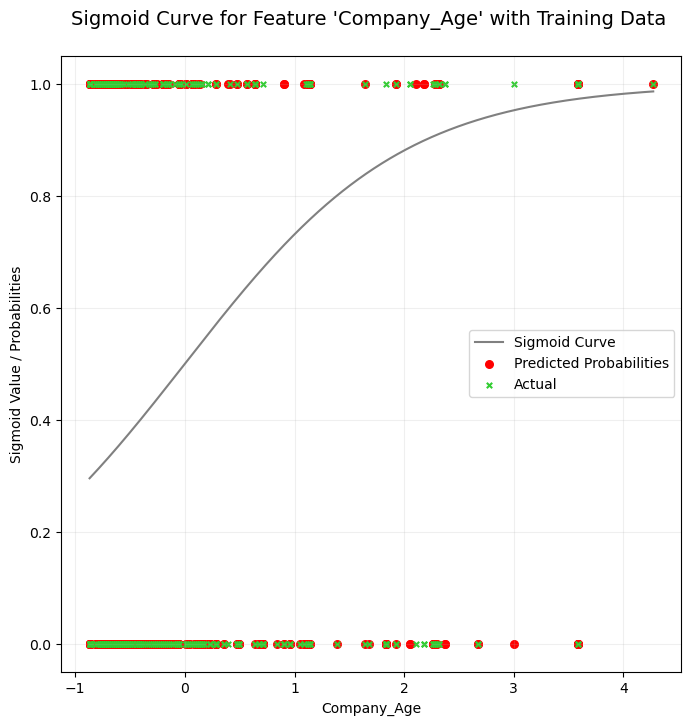

In [276]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = X_train['Company_Age'] 
sigmoid_values = sigmoid(X_values)

# Generate a range of continuous X_values
X_values = np.linspace(X_train['Company_Age'].min(), X_train['Company_Age'].max(), 1000)
sigmoid_values = sigmoid(X_values)

# plt.figure(figsize=(20, 7))
plt.figure(figsize=(8, 8))

# Plot the sigmoid curve
plt.plot(X_values, sigmoid_values, label="Sigmoid Curve", color = 'gray')

# Overlay the actual and predicted probabilities
plt.scatter(X_train['Company_Age'], results['Prediction'], label="Predicted Probabilities", marker='o', color='red', s=30)
plt.scatter(X_train['Company_Age'], results['Actual'], label="Actual", marker='x', color='limegreen', s=15)

# Add labels and legend
plt.xlabel('Company_Age')
plt.ylabel("Sigmoid Value / Probabilities")
plt.title("Sigmoid Curve for Feature 'Company_Age' with Training Data \n", fontsize = 14)
plt.legend()

# Show the plot
plt.grid(True, alpha = 0.2)
plt.show()

### Model Evaluation

In [277]:
# Calculating the confusion matrix
cm = confusion_matrix(y_train, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_train, predictions)

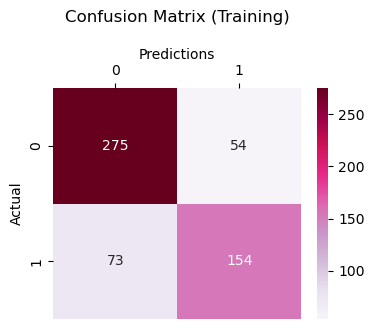

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.7715827338129496

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       329
           1       0.74      0.68      0.71       227

    accuracy                           0.77       556
   macro avg       0.77      0.76      0.76       556
weighted avg       0.77      0.77      0.77       556



In [278]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='PuRd')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Training)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_train, predictions))

Text(0.5, 1.0, 'ROC Curve Using Training Data')

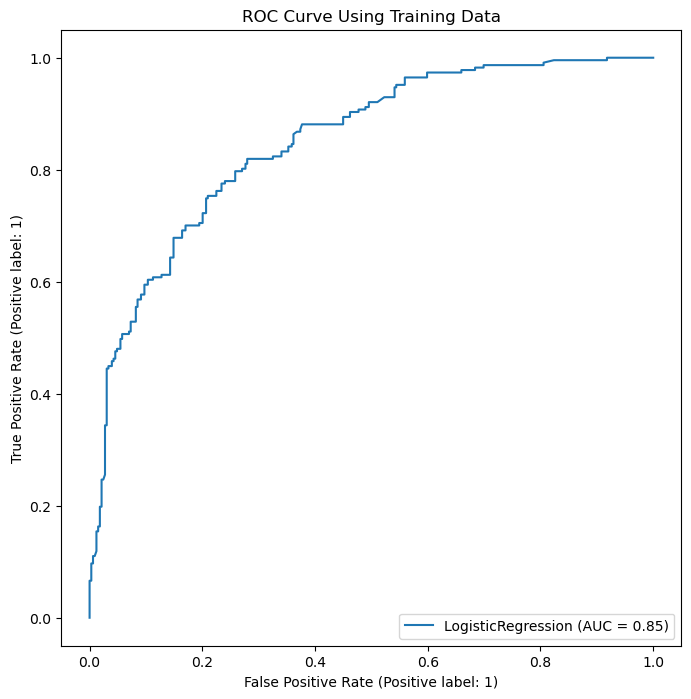

In [279]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)
# RocCurveDisplay.from_estimator(model, feature_test, target_test)
RocCurveDisplay.from_estimator(classifier, X_train, y_train)
plt.title('ROC Curve Using Training Data')

# The model type is automatically detected and noted in the legend

### Predictions with Testing Data

In [280]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

Prediction  Actual
0           1       0
1           0       0
2           0       1
3           0       0
4           0       0

### Sigmoid Plot (Testing)

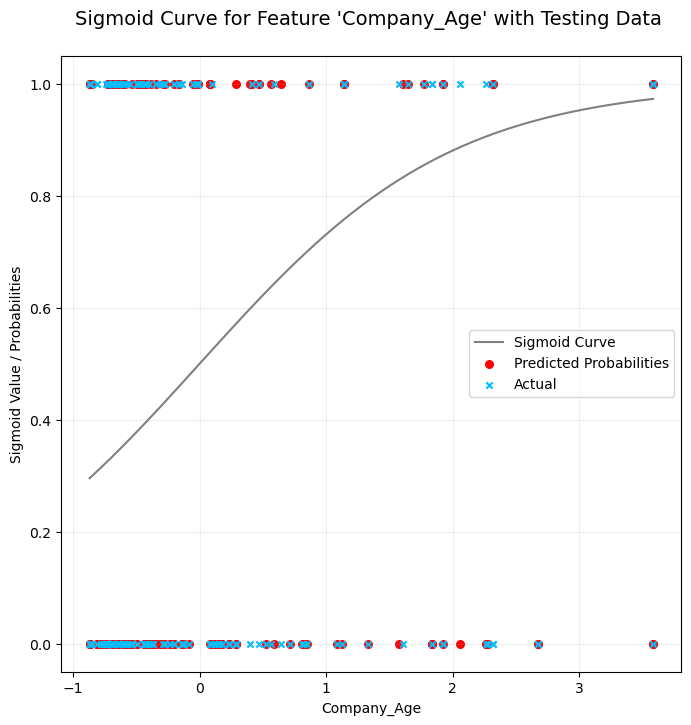

In [281]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_values = X_test['Company_Age'] 
sigmoid_values = sigmoid(X_values)

# Generate a range of continuous X_values
X_values = np.linspace(X_test['Company_Age'].min(), X_test['Company_Age'].max(), 1000)
sigmoid_values = sigmoid(X_values)

# plt.figure(figsize=(20, 7))
plt.figure(figsize=(8, 8))

# Plot the sigmoid curve
plt.plot(X_values, sigmoid_values, label="Sigmoid Curve", color = 'gray')

# Overlay the actual and predicted probabilities
plt.scatter(X_test['Company_Age'], results['Prediction'], label="Predicted Probabilities", marker='o', color='red', s=30)
plt.scatter(X_test['Company_Age'], results['Actual'], label="Actual", marker='x', color='deepskyblue', s=20)

# Add labels and legend
plt.xlabel('Company_Age')
plt.ylabel("Sigmoid Value / Probabilities")
plt.title("Sigmoid Curve for Feature 'Company_Age' with Testing Data \n", fontsize = 14)
plt.legend()

# Show the plot
plt.grid(True, alpha = 0.2)
plt.show()

### Model Evaluation

In [282]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df_TF = pd.DataFrame(index=["Actual 0", "Actual 1"], columns={f"Predicted 0": ['', ''], f"Predicted 1":['', '']})

cm_df_TF.loc["Actual 0", "Predicted 0"] = 'TN'
cm_df_TF.loc["Actual 0", "Predicted 1"] = 'FP'
cm_df_TF.loc["Actual 1", "Predicted 0"] = 'FN'
cm_df_TF.loc["Actual 1", "Predicted 1"] = 'TP'

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

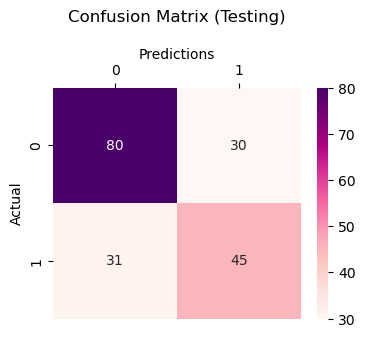

Predicted 0 Predicted 1
Actual 0          TN          FP
Actual 1          FN          TP


Accuracy Score :  0.6720430107526881

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       110
           1       0.60      0.59      0.60        76

    accuracy                           0.67       186
   macro avg       0.66      0.66      0.66       186
weighted avg       0.67      0.67      0.67       186



In [283]:
# Displaying results
# Create a heatmap
fig, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(cm, annot = True, fmt = 'd', cmap='RdPu')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix (Testing)\n')
plt.show()

display(cm_df_TF)
print(f"\nAccuracy Score :  {acc_score}")
print("\n\033[1m\033[4mClassification Report\033[0m")
print(classification_report(y_test, predictions))

Text(0.5, 1.0, 'ROC Curve Using Testing Data')

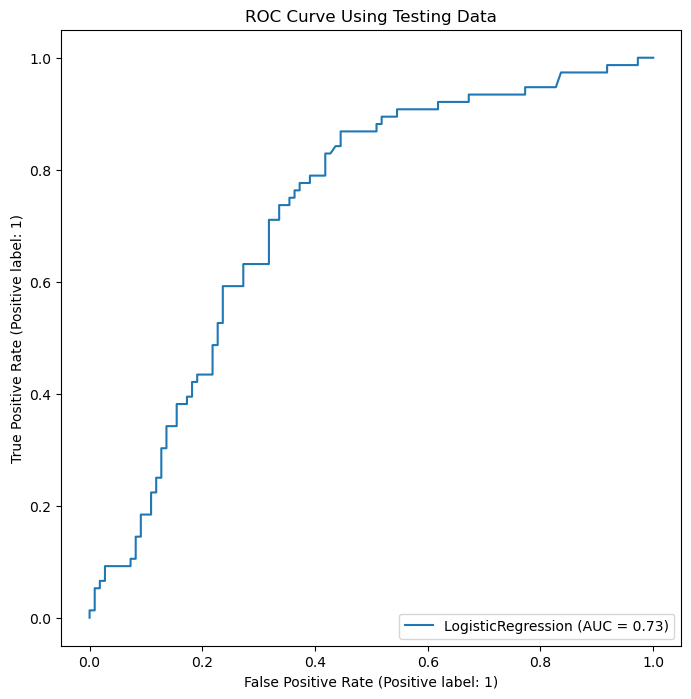

In [284]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (8, 8)
# RocCurveDisplay.from_estimator(model, feature_test, target_test)
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title('ROC Curve Using Testing Data')

# The model type is automatically detected and noted in the legend

### Feature Importance

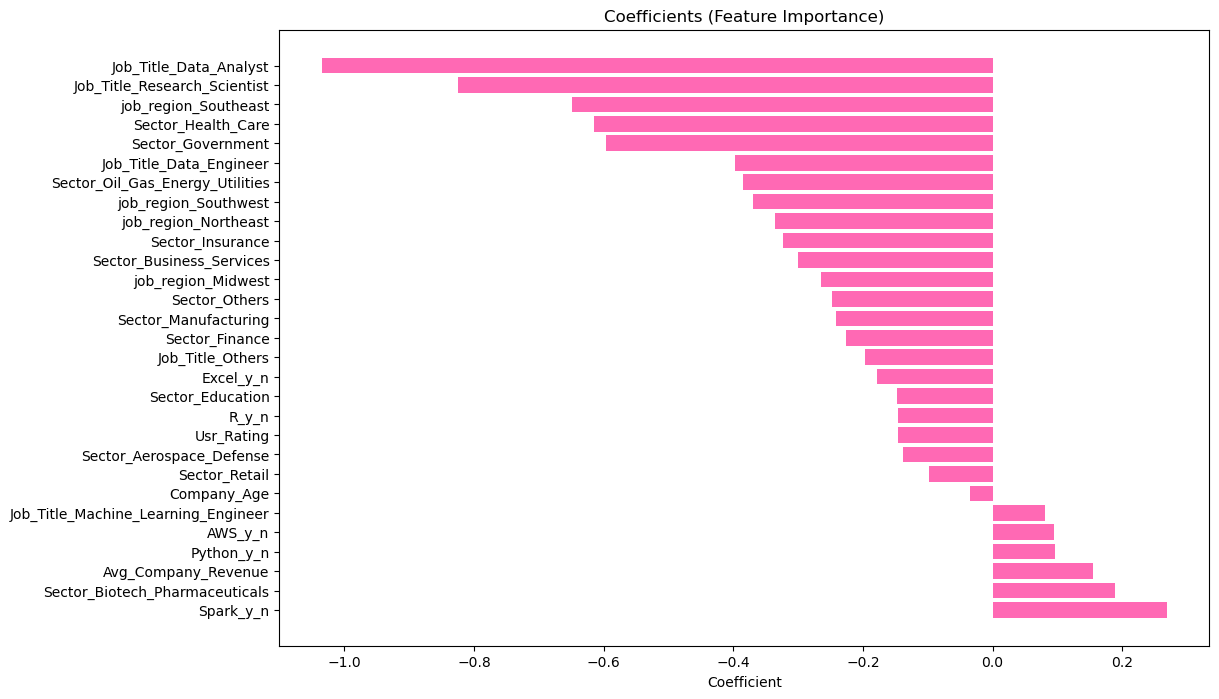

In [285]:
feature_importance = classifier.coef_[0]

# DataFrame to display feature names and their corresponding coefficients
importance_df = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': feature_importance})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='hotpink')
plt.xlabel('Coefficient')
# plt.ylabel('Feature')
plt.title('Coefficients (Feature Importance)')
plt.show()

### Close Connection to SQLite Database

In [200]:
# Step 5.  Close connection
connection.close()